# Importing Necessary Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [223]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

# Importing the Dataset

In [262]:
# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names
# read data
train = pd.read_csv('/content/drive/MyDrive/Aircraft Datasets/train_FD001.txt',sep='\s+', header=None, names=col_names)
test = pd.read_csv('/content/drive/MyDrive/Aircraft Datasets/test_FD001.txt',sep='\s+', header=None, names=col_names)
y_test = pd.read_csv('/content/drive/MyDrive/Aircraft Datasets/RUL_FD001.txt', sep='\s+', header=None, names=['RUL'])
# Train data contains all features (Unit Number + setting parameters & sensor parameters)
# Test data contains all features (Unit Number + setting parameters & sensor parameters)
# Y_test contains RUL for the test data.
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    -0.0007    -0.0004      100.0  518.67  641.82   
1        1            2     0.0019    -0.0003      100.0  518.67  642.15   
2        1            3    -0.0043     0.0003      100.0  518.67  642.35   
3        1            4     0.0007     0.0000      100.0  518.67  642.35   
4        1            5    -0.0019    -0.0002      100.0  518.67  642.37   

       s_3      s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11  \
0  1589.70  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47   
1  1591.82  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49   
2  1587.99  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27   
3  1582.79  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13   
4  1582.85  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28   

     s_12     s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  
0  521.66  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  
1  522.28  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  
2  522.42  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  
3  522.86  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  
4  522.19  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044

In [263]:
train['unit_nr'].unique()
# There are 100 no unique engines.


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [264]:
train['unit_nr'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [265]:
y_test.shape
# RUL value for 100 no of engines
(100,1)

(100, 1)

In [266]:
train.describe()

unit_nr   time_cycles     setting_1     setting_2  setting_3  \
count  20631.000000  20631.000000  20631.000000  20631.000000    20631.0   
mean      51.506568    108.807862     -0.000009      0.000002      100.0   
std       29.227633     68.880990      0.002187      0.000293        0.0   
min        1.000000      1.000000     -0.008700     -0.000600      100.0   
25%       26.000000     52.000000     -0.001500     -0.000200      100.0   
50%       52.000000    104.000000      0.000000      0.000000      100.0   
75%       77.000000    156.000000      0.001500      0.000300      100.0   
max      100.000000    362.000000      0.008700      0.000600      100.0   

                s_1           s_2           s_3           s_4           s_5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

                s_6           s_7           s_8           s_9          s_10  \
count  20631.000000  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean      21.609803    553.367711   2388.096652   9065.242941  1.300000e+00   
std        0.001389      0.885092      0.070985     22.082880  4.660829e-13   
min       21.600000    549.850000   2387.900000   9021.730000  1.300000e+00   
25%       21.610000    552.810000   2388.050000   9053.100000  1.300000e+00   
50%       21.610000    553.440000   2388.090000   9060.660000  1.300000e+00   
75%       21.610000    554.010000   2388.140000   9069.420000  1.300000e+00   
max       21.610000    556.060000   2388.560000   9244.590000  1.300000e+00   

               s_11          s_12          s_13          s_14          s_15  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      47.541168    521.413470   2388.096152   8143.752722      8.442146   
std        0.267087      0.737553      0.071919     19.076176      0.037505   
min       46.850000    518.690000   2387.880000   8099.940000      8.324900   
25%       47.350000    520.960000   2388.040000   8133.245000      8.414900   
50%       47.510000    521.480000   2388.090000   8140.540000      8.438900   
75%       47.700000    521.950000   2388.140000   8148.310000      8.465600   
max       48.530000    523.380000   2388.560000   8293.720000      8.584800   

               s_16          s_17     s_18     s_19          s_20  \
count  2.063100e+04  20631.000000  20631.0  20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0    100.0     38.816271   
std    1.556432e-14      1.548763      0.0      0.0      0.180746   
min    3.000000e-02    388.000000   2388.0    100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0    100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0    100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0    100.0     38.950000   
max    3.000000e-02    400.000000   2388.0    100.0     39.430000   

               s_21  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400

In [267]:
train=train.drop('setting_3',axis=1)

# calculate and add RUL(Remaining Useful Life) to the train dataset.



In [268]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()

    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)

    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life

    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame
train = add_remaining_useful_life(train)
train.head()

unit_nr  time_cycles  setting_1  setting_2     s_1     s_2      s_3  \
0        1            1    -0.0007    -0.0004  518.67  641.82  1589.70   
1        1            2     0.0019    -0.0003  518.67  642.15  1591.82   
2        1            3    -0.0043     0.0003  518.67  642.35  1587.99   
3        1            4     0.0007     0.0000  518.67  642.35  1582.79   
4        1            5    -0.0019    -0.0002  518.67  642.37  1582.85   

       s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11    s_12  \
0  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47  521.66   
1  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49  522.28   
2  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27  522.42   
3  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13  522.86   
4  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28  522.19   

      s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  RUL  
0  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  191  
1  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  190  
2  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  189  
3  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  188  
4  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044  187

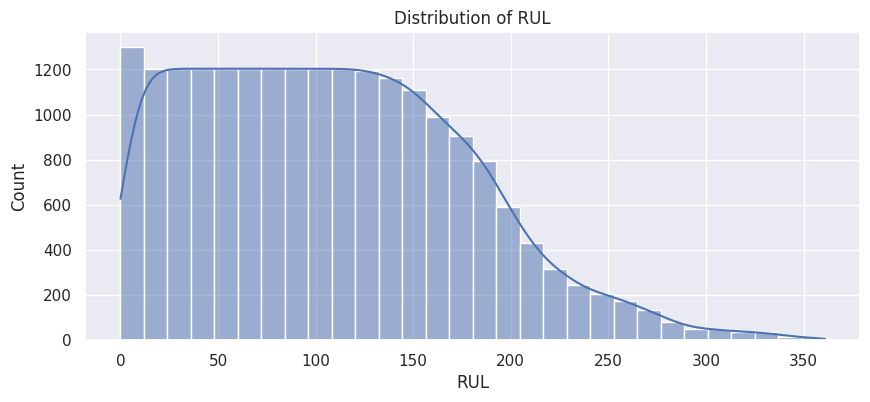

In [269]:
plt.figure(figsize=(10, 4))
sns.histplot(train['RUL'], kde=True, bins=30)
plt.title('Distribution of RUL')
plt.show()

# Plot Sensors vs Cycles

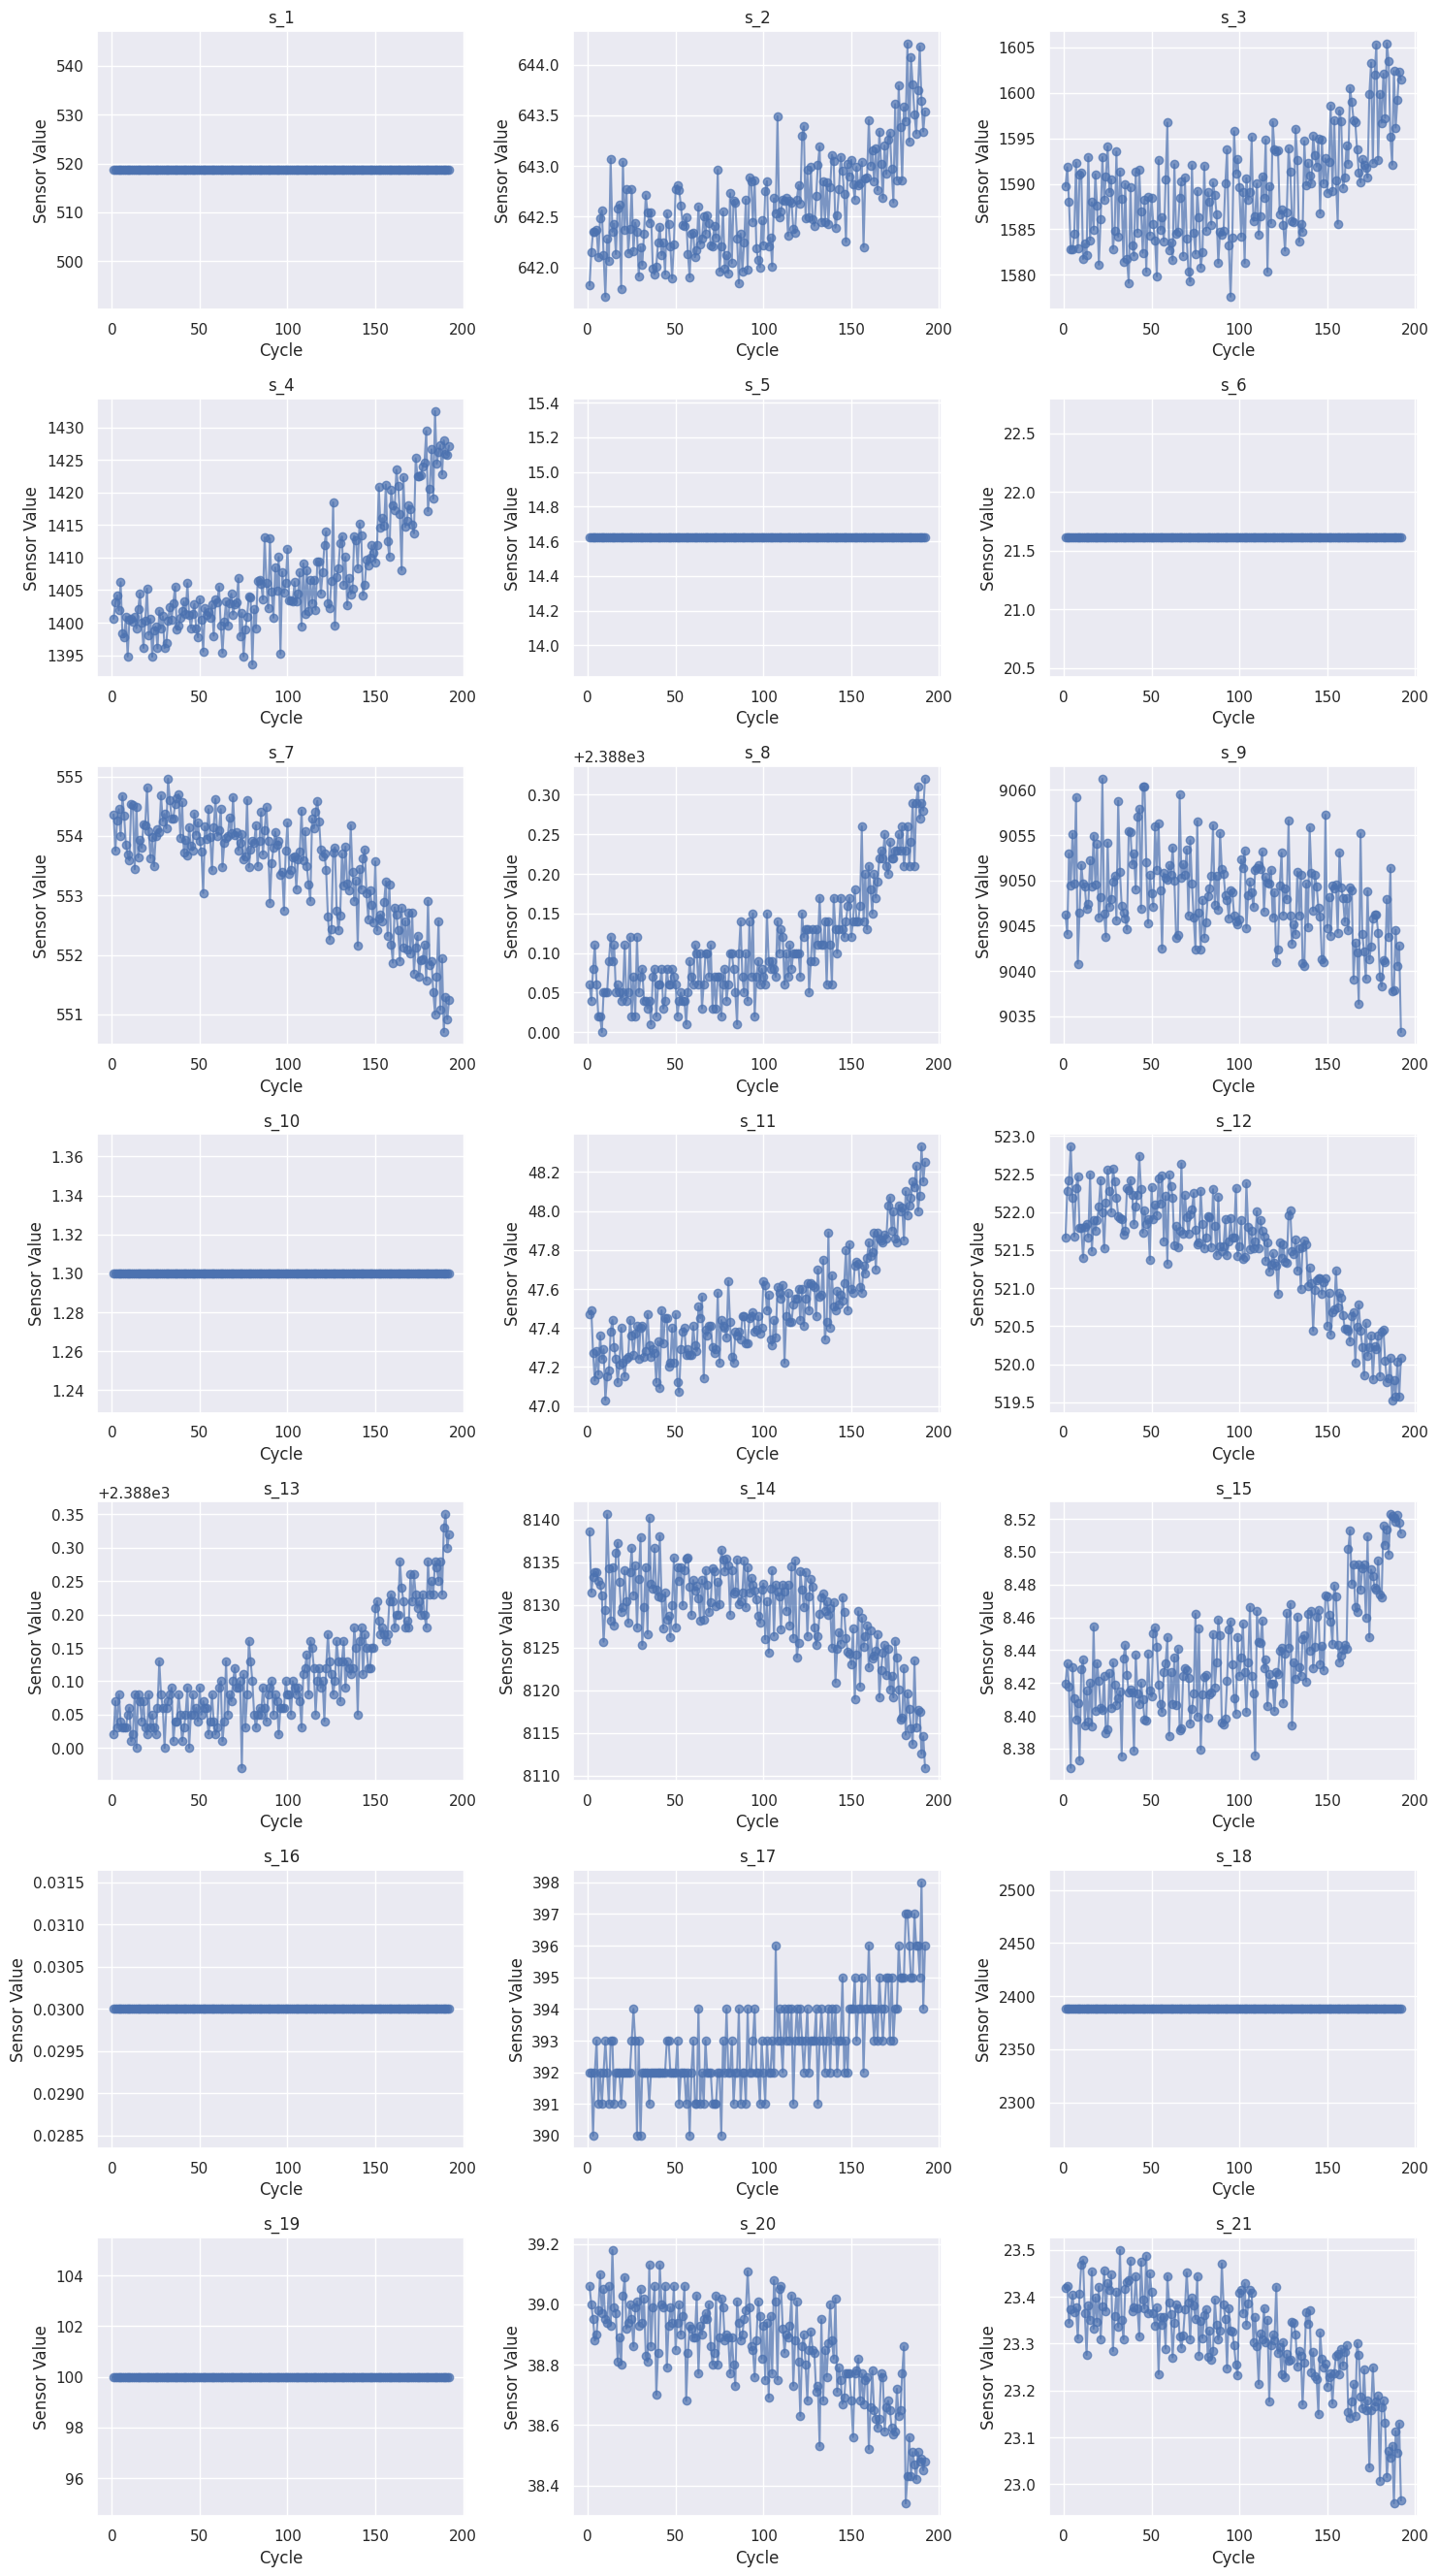

In [214]:
# List of sensors you want to visualize
sensors = ['s_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8',
           's_9', 's_10', 's_11', 's_12', 's_13', 's_14', 's_15',
           's_16', 's_17', 's_18', 's_19', 's_20', 's_21']

# Select one engine (example: engine with ID = 1)
engine_id = 1
engine_data = train[train['unit_nr'] == engine_id]

# Create subplots for all sensors
plt.figure(figsize=(15, 30))

for i, sensor in enumerate(sensors, 1):
    plt.subplot(len(sensors)//3 + 1, 3, i)
    plt.plot(engine_data['time_cycles'], engine_data[sensor], marker='o', linestyle='-', alpha=0.7)
    plt.title(sensor)
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Feature Engineering

#### Rate Of Change (ROC)
- Absolute Rate of Change (Difference from previous cycle)
- Relative Change (Percentage change from previous cycle)
- Rolling Change over a window (Trend across multiple cycles)



In [ ]:
train_copy_ROC = train.copy()
test_copy_ROC = test.copy()

In [ ]:
sensors = ['s_1', 's_2', 's_3','s_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
           's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21']



In [ ]:
# Rate Of Change Function
def ROC(df , sensors , window_size):
  for sensor in sensors:

    #  Absolute Rate of Change (Difference from previous cycle)
    df[f'{sensor}_rate_of_change'] = df.groupby('unit_nr')[sensor].diff().reset_index(level=0, drop=True)

    #  Relative Change (Percentage change from previous cycle)
    df[f'{sensor}_relative_change'] = df.groupby('unit_nr')[sensor].pct_change().reset_index(level=0, drop=True)

    #  Rolling Change over a window (Trend across multiple cycles)
    df[f'{sensor}_rolling_change_{window_size}'] = df.groupby('unit_nr')[sensor].apply(lambda x: x.rolling(window_size).apply(lambda y: y.iloc[-1] - y.iloc[0])).reset_index(level=0, drop=True)


  return df.fillna(0)




In [ ]:
# add ROC columns
train_copy_ROC = ROC(train_copy_ROC , sensors , 15)
test_copy_ROC = ROC(test_copy_ROC , sensors , 15)

In [ ]:
train_copy_ROC.shape

(20631, 89)

In [ ]:
train_copy_ROC.head()


unit_nr  time_cycles  setting_1  setting_2     s_1     s_2      s_3  \
0        1            1    -0.0007    -0.0004  518.67  641.82  1589.70   
1        1            2     0.0019    -0.0003  518.67  642.15  1591.82   
2        1            3    -0.0043     0.0003  518.67  642.35  1587.99   
3        1            4     0.0007     0.0000  518.67  642.35  1582.79   
4        1            5    -0.0019    -0.0002  518.67  642.37  1582.85   

       s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11    s_12  \
0  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47  521.66   
1  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49  522.28   
2  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27  522.42   
3  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13  522.86   
4  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28  522.19   

      s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  RUL  \
0  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  191   
1  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  190   
2  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  189   
3  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  188   
4  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044  187   

   s_1_rate_of_change  s_1_relative_change  s_1_rolling_change_15  \
0                 0.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   

   s_2_rate_of_change  s_2_relative_change  s_2_rolling_change_15  \
0                0.00             0.000000                    0.0   
1                0.33             0.000514                    0.0   
2                0.20             0.000311                    0.0   
3                0.00             0.000000                    0.0   
4                0.02             0.000031                    0.0   

   s_3_rate_of_change  s_3_relative_change  s_3_rolling_change_15  \
0                0.00             0.000000                    0.0   
1                2.12             0.001334                    0.0   
2               -3.83            -0.002406                    0.0   
3               -5.20            -0.003275                    0.0   
4                0.06             0.000038                    0.0   

   s_4_rate_of_change  s_4_relative_change  s_4_rolling_change_15  \
0                0.00             0.000000                    0.0   
1                2.54             0.001814                    0.0   
2                1.06             0.000755                    0.0   
3               -2.33            -0.001659                    0.0   
4                4.35             0.003103                    0.0   

   s_5_rate_of_change  s_5_relative_change  s_5_rolling_change_15  \
0                 0.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   

   s_6_rate_of_change  s_6_relative_change  s_6_rolling_change_15  \
0                 0.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   

   s_7_rate_of_change  s_7_relative_change  s_7_rolling_change_15  \
0                0.00             0.000000                    0.0   
1               

##### Visualization

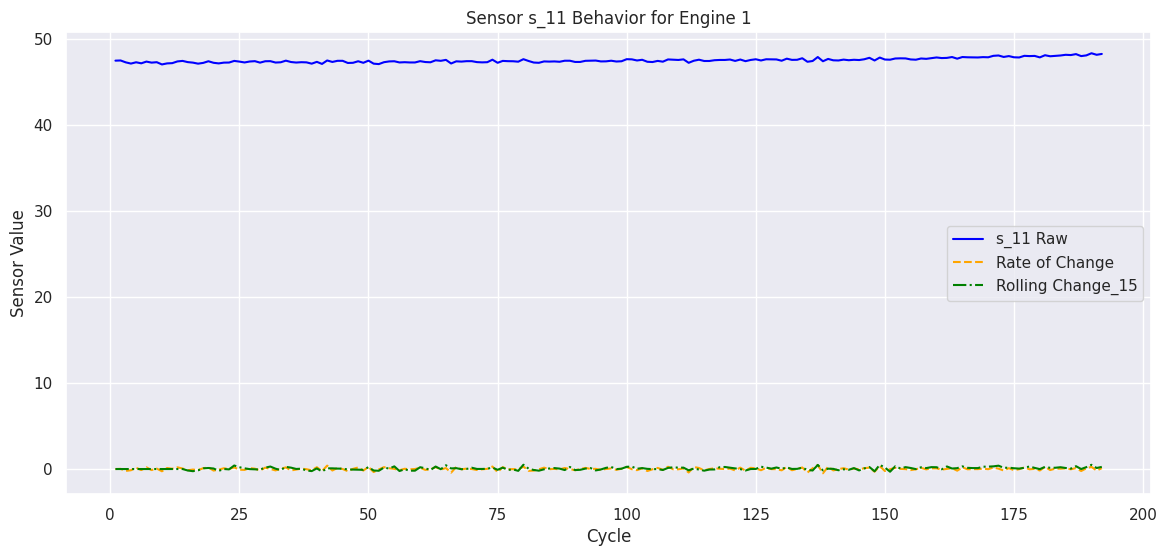

In [ ]:
# Example: Plotting Sensor s3 for engine id = 1
engine_id = 1
sensor = 's_11'

subset = train_copy_ROC[train_copy_ROC['unit_nr'] == engine_id]

plt.figure(figsize=(14,6))

plt.plot(subset['time_cycles'], subset[sensor], label=f'{sensor} Raw', color='blue')
plt.plot(subset['time_cycles'], subset[f'{sensor}_rate_of_change'], label='Rate of Change', linestyle='--', color='orange')
plt.plot(subset['time_cycles'], subset[f'{sensor}_rolling_change_15'], label='Rolling Change_15', linestyle='-.', color='green')

plt.xlabel('Cycle')
plt.ylabel('Sensor Value')
plt.legend()
plt.title(f'Sensor {sensor} Behavior for Engine {engine_id}')
plt.grid(True)
plt.show()


<ipython-input-282-64aacf050b39>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=train_copy_ROC, x=f's_5_rate_of_change', y='RUL', palette='tab10')


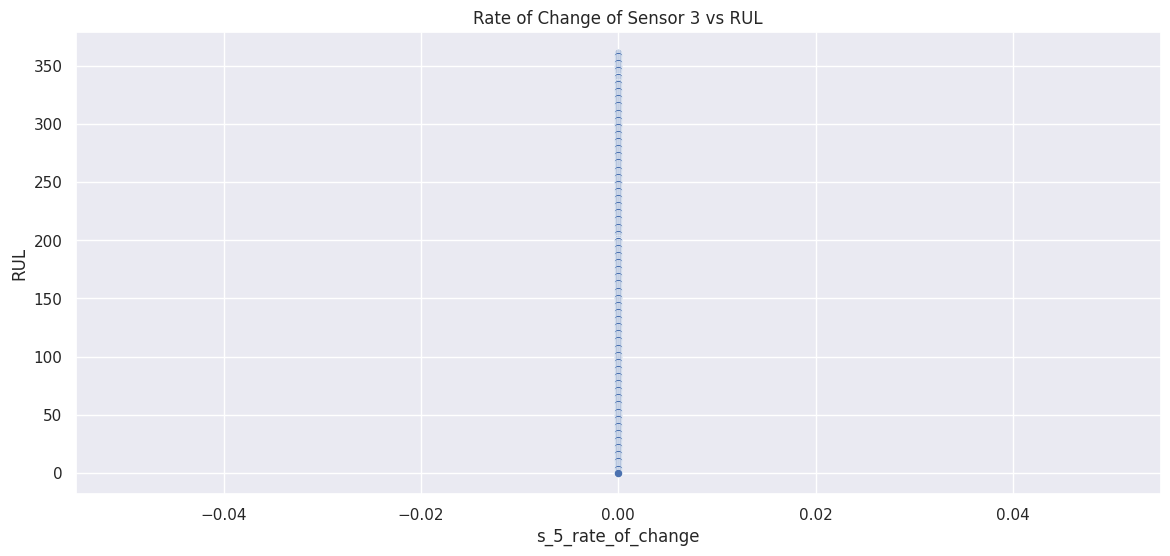

In [ ]:
# Example for s3 rate of change
plt.figure(figsize=(14,6))
sns.scatterplot(data=train_copy_ROC, x=f's_5_rate_of_change', y='RUL', palette='tab10')
plt.title('Rate of Change of Sensor 3 vs RUL')
plt.show()

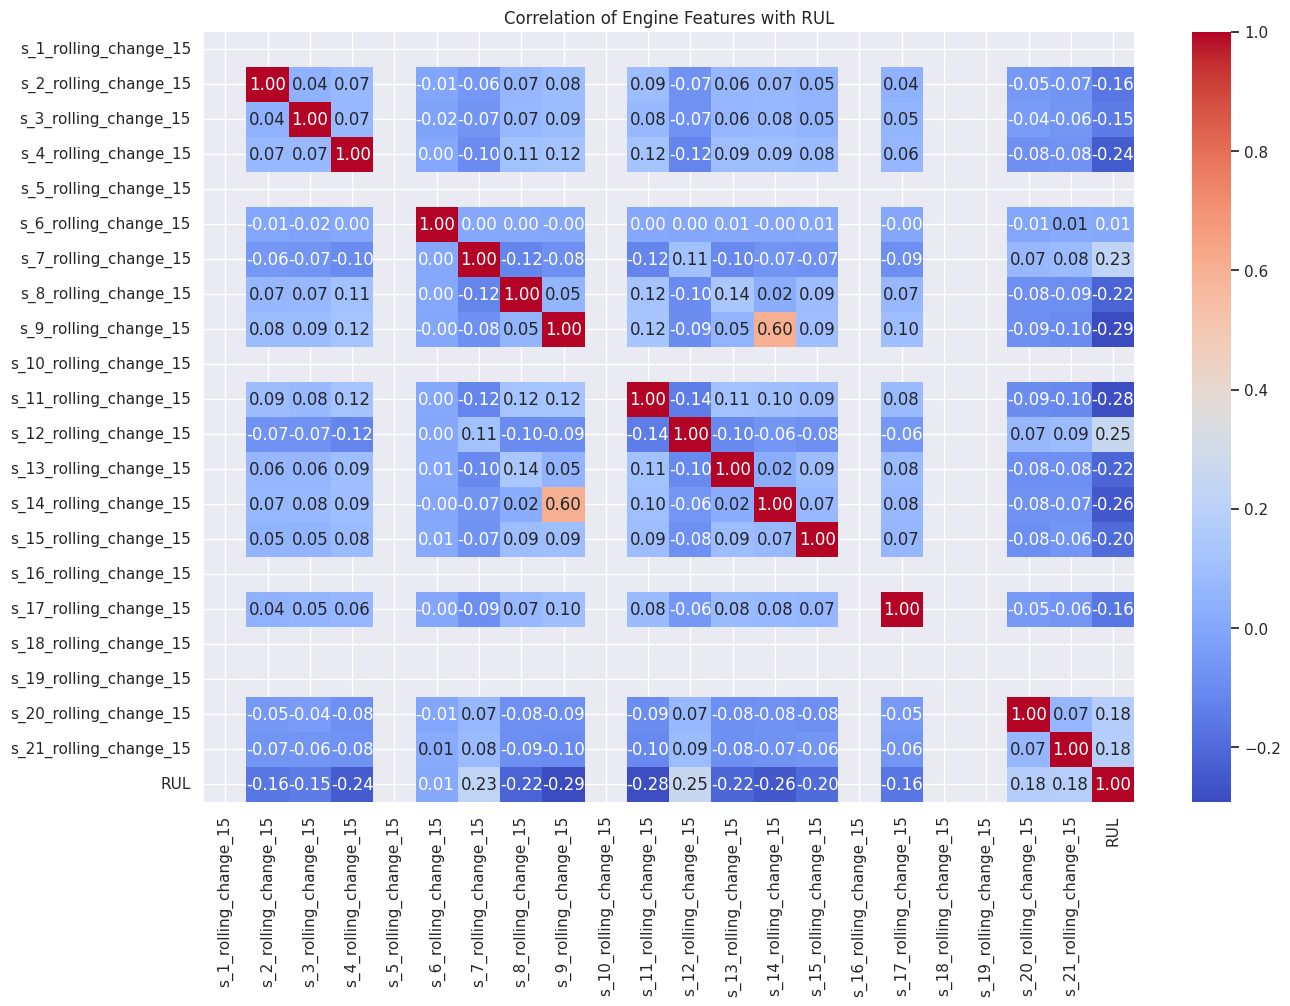

In [ ]:
import numpy as np

change_features = [col for col in train_copy_ROC.columns if '_rolling_change' in col]
corr = train_copy_ROC[change_features + ['RUL']].corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Engine Features with RUL')
plt.show()


#### Moving Average

In [321]:
train_copy_MA = train.copy()
test_copy_MA = test.copy()

In [316]:
def moving_average(df, sensors, window_size):
    for sensor in sensors:
        df[f'{sensor}_moving_average_{window_size}'] = df.groupby('unit_nr')[sensor]\
                                                         .rolling(window=window_size).mean()\
                                                         .reset_index(level=0, drop=True)
    return df.fillna(0)



In [322]:
train_copy_MA = moving_average(train_copy_MA, sensors, 3)
test_copy_MA = moving_average(test_copy_MA, sensors, 3)

In [318]:
train_copy_MA.head()

unit_nr  time_cycles  setting_1  setting_2     s_1     s_2      s_3  \
0        1            1    -0.0007    -0.0004  518.67  641.82  1589.70   
1        1            2     0.0019    -0.0003  518.67  642.15  1591.82   
2        1            3    -0.0043     0.0003  518.67  642.35  1587.99   
3        1            4     0.0007     0.0000  518.67  642.35  1582.79   
4        1            5    -0.0019    -0.0002  518.67  642.37  1582.85   

       s_4    s_5    s_6     s_7      s_8      s_9  s_10   s_11    s_12  \
0  1400.60  14.62  21.61  554.36  2388.06  9046.19   1.3  47.47  521.66   
1  1403.14  14.62  21.61  553.75  2388.04  9044.07   1.3  47.49  522.28   
2  1404.20  14.62  21.61  554.26  2388.08  9052.94   1.3  47.27  522.42   
3  1401.87  14.62  21.61  554.45  2388.11  9049.48   1.3  47.13  522.86   
4  1406.22  14.62  21.61  554.00  2388.06  9055.15   1.3  47.28  522.19   

      s_13     s_14    s_15  s_16  s_17  s_18   s_19   s_20     s_21  RUL  \
0  2388.02  8138.62  8.4195  0.03   392  2388  100.0  39.06  23.4190  191   
1  2388.07  8131.49  8.4318  0.03   392  2388  100.0  39.00  23.4236  190   
2  2388.03  8133.23  8.4178  0.03   390  2388  100.0  38.95  23.3442  189   
3  2388.08  8133.83  8.3682  0.03   392  2388  100.0  38.88  23.3739  188   
4  2388.04  8133.80  8.4294  0.03   393  2388  100.0  38.90  23.4044  187   

   s_1_moving_average_5  s_2_moving_average_5  s_3_moving_average_5  \
0                  0.00                 0.000                  0.00   
1                  0.00                 0.000                  0.00   
2                  0.00                 0.000                  0.00   
3                  0.00                 0.000                  0.00   
4                518.67               642.208               1587.03   

   s_4_moving_average_5  s_5_moving_average_5  s_6_moving_average_5  \
0                 0.000                  0.00                  0.00   
1                 0.000                  0.00                  0.00   
2                 0.000                  0.00                  0.00   
3                 0.000                  0.00                  0.00   
4              1403.206                 14.62                 21.61   

   s_7_moving_average_5  s_8_moving_average_5  s_9_moving_average_5  \
0                 0.000                  0.00                 0.000   
1                 0.000                  0.00                 0.000   
2                 0.000                  0.00                 0.000   
3                 0.000                  0.00                 0.000   
4               554.164               2388.07              9049.566   

   s_10_moving_average_5  s_11_moving_average_5  s_12_moving_average_5  \
0                    0.0                  0.000                  0.000   
1                    0.0                  0.000                  0.000   
2                    0.0                  0.000                  0.000   
3                    0.0                  0.000                  0.000   
4                    1.3                 47.328                522.282   

   s_13_moving_average_5  s_14_moving_average_5  s_15_moving_average_5  \
0                  0.000                  0.000                0.00000   
1                  0.000                  0.000                0.00000   
2                  0.000                  0.000                0.00000   
3                  0.000                  0.000                0.00000   
4               2388.048               8134.194                8.41334   

   s_16_moving_average_5  s_17_moving_average_5  s_18_moving_average_5  \
0                   0.00                    0.0                    0.0   
1                   0.00                    0.0                    0.0   
2                   0.00                    0.0                    0.0   
3                   0.00                    0.0                    0.0   
4                   0.03                  391.8                 2388.0   

   s_19_moving_average_5  s_

Correlation Between RUL&Moving Average 60

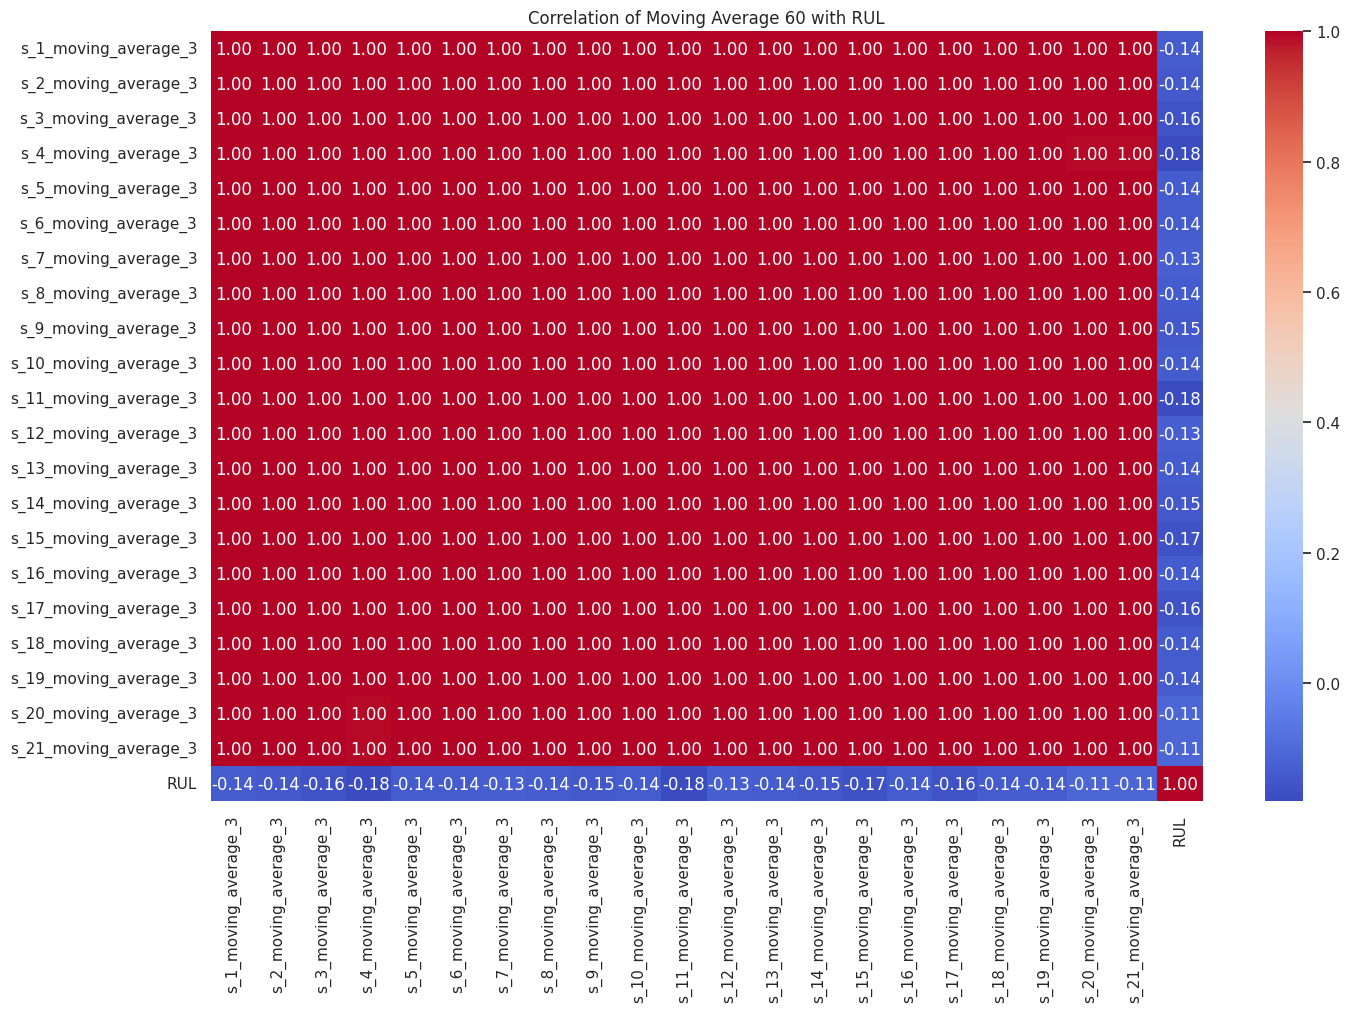

In [323]:
import numpy as np

change_features = [col for col in train_copy_MA.columns if '_moving_average_3' in col]
corr = train_copy_MA[change_features + ['RUL']].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Moving Average 60 with RUL')
plt.show()


Visualize Moving Average 60 over engine 1

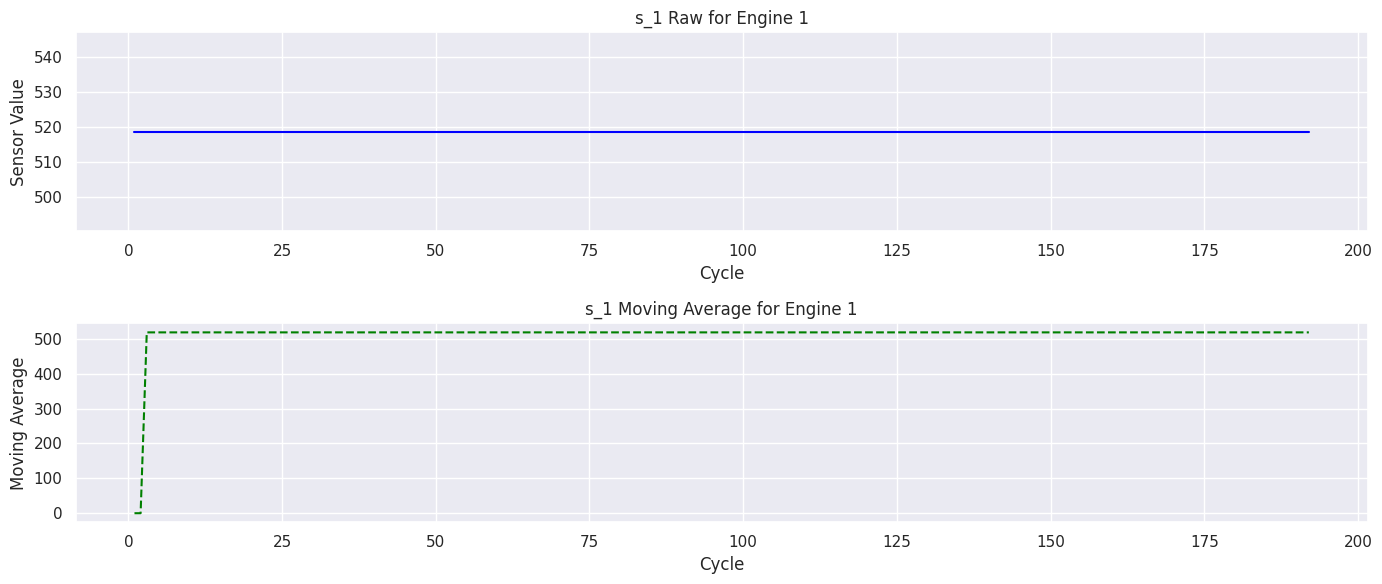

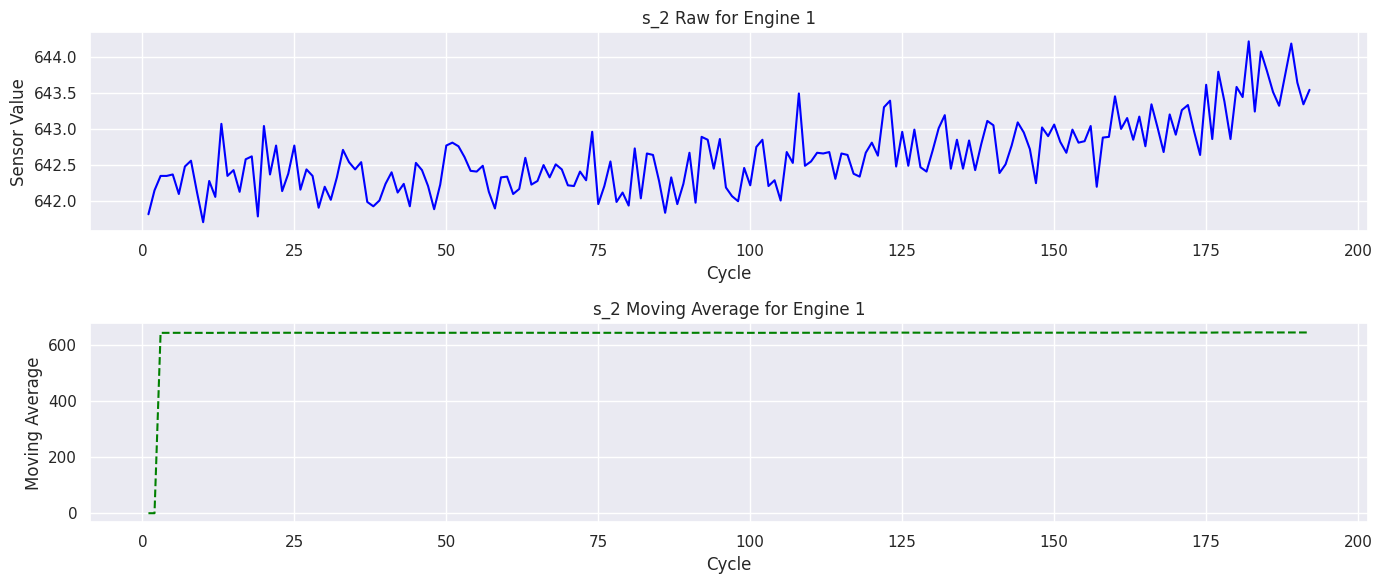

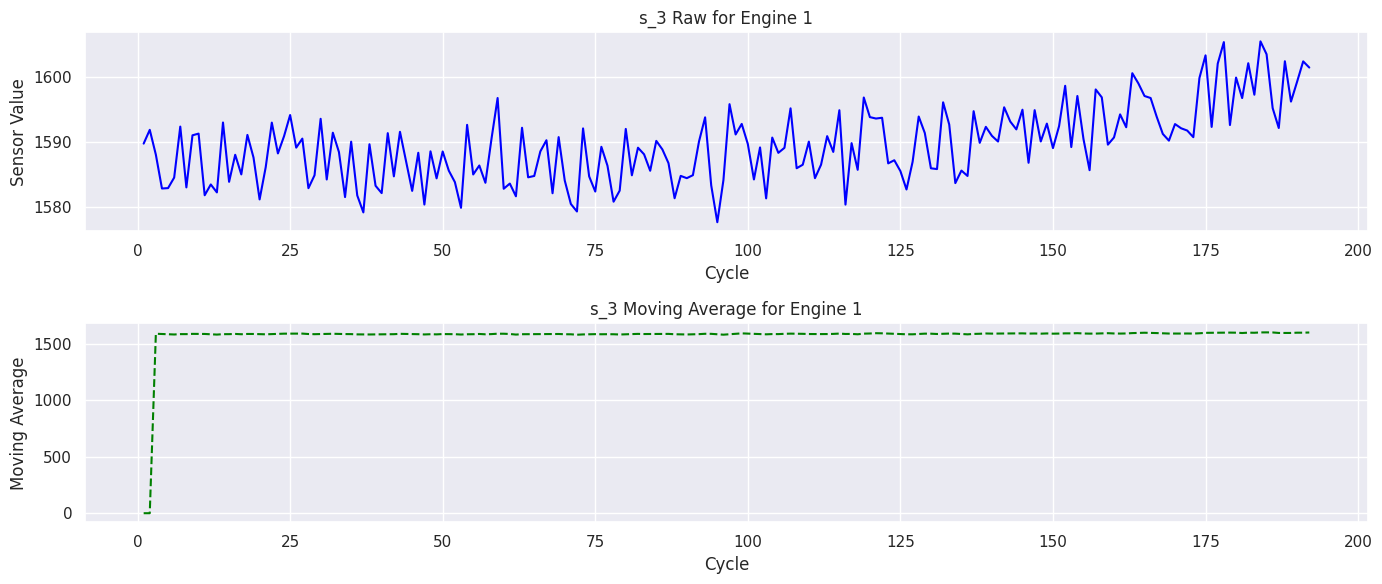

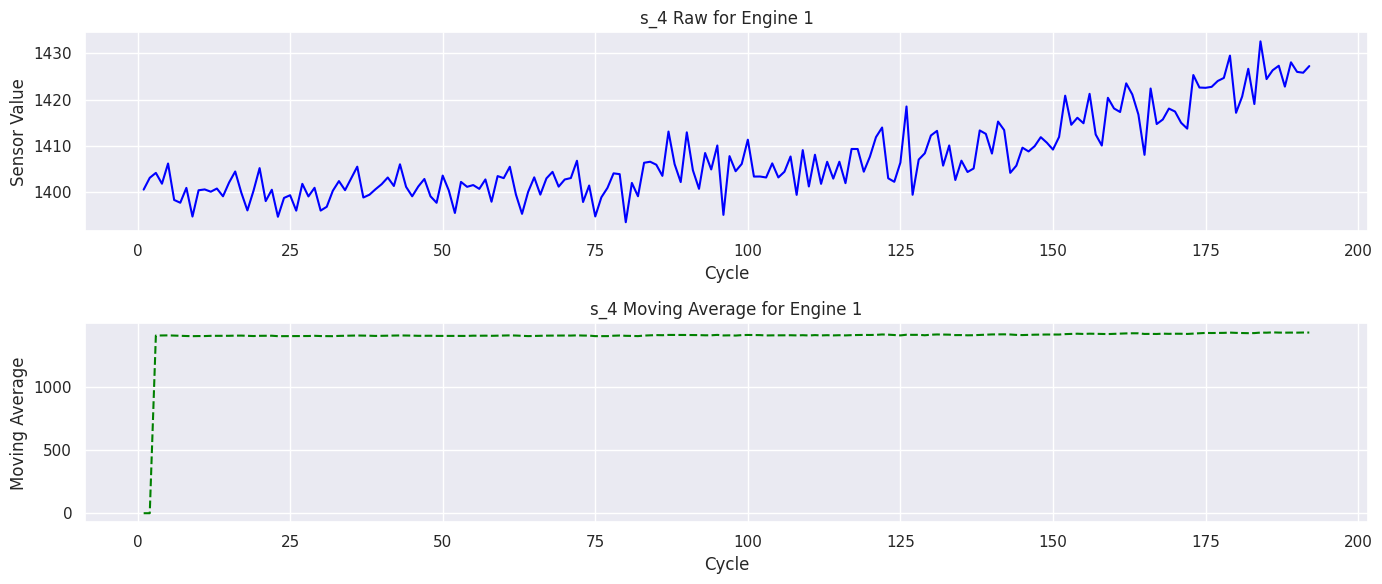

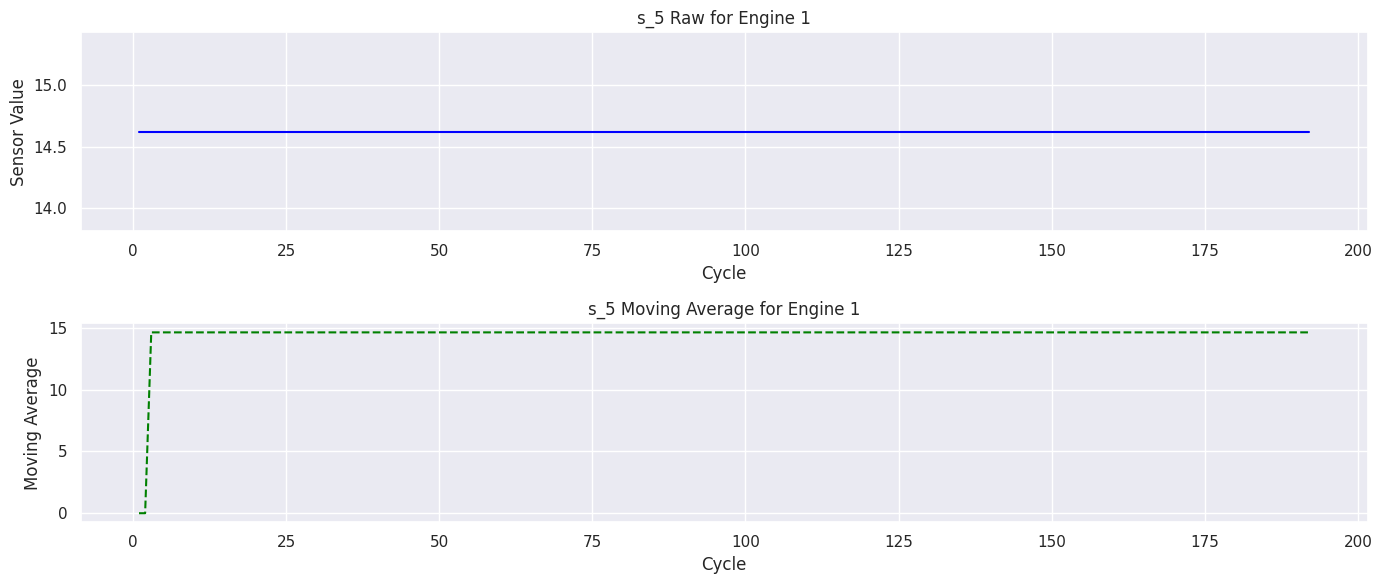

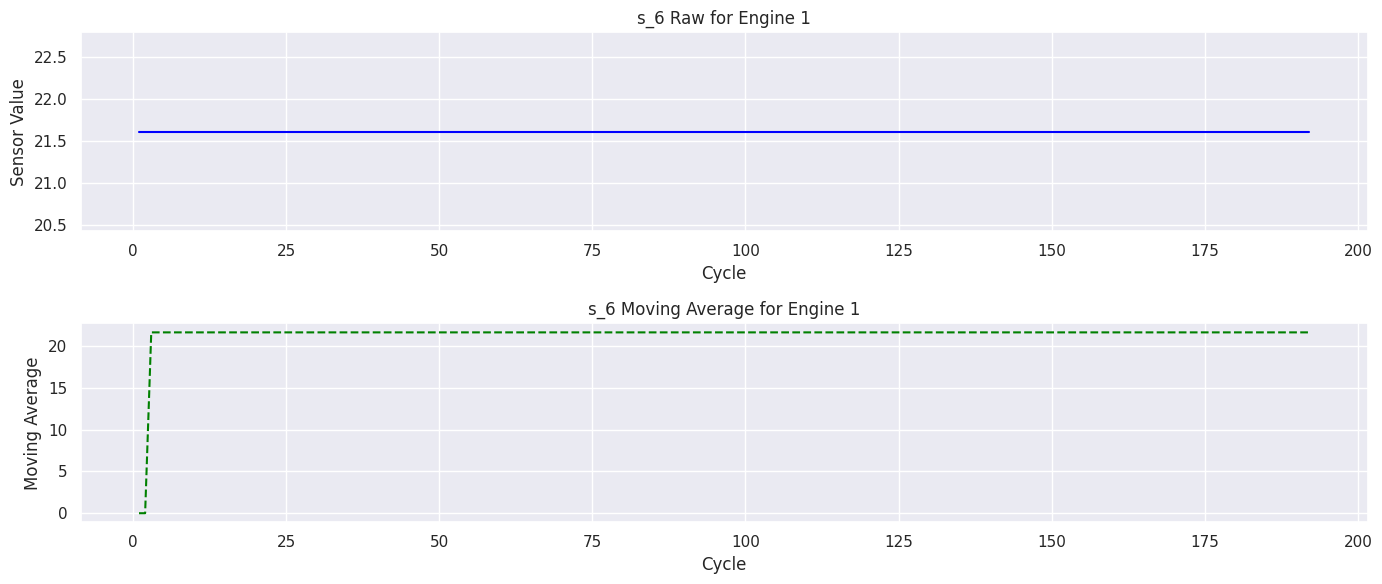

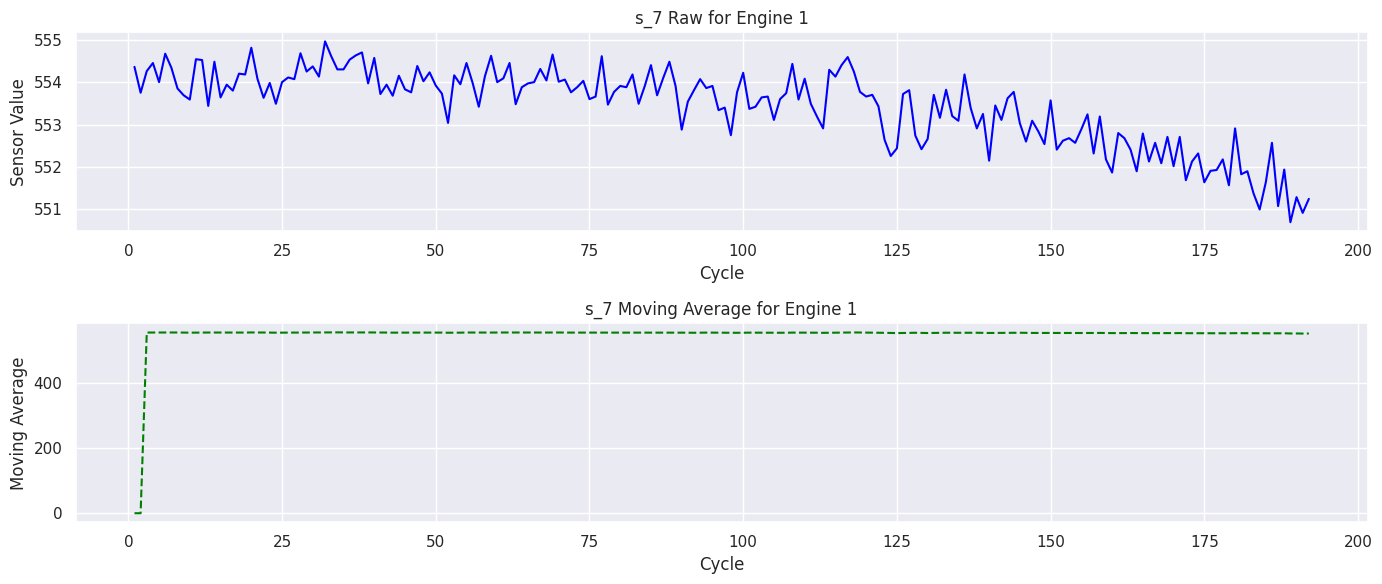

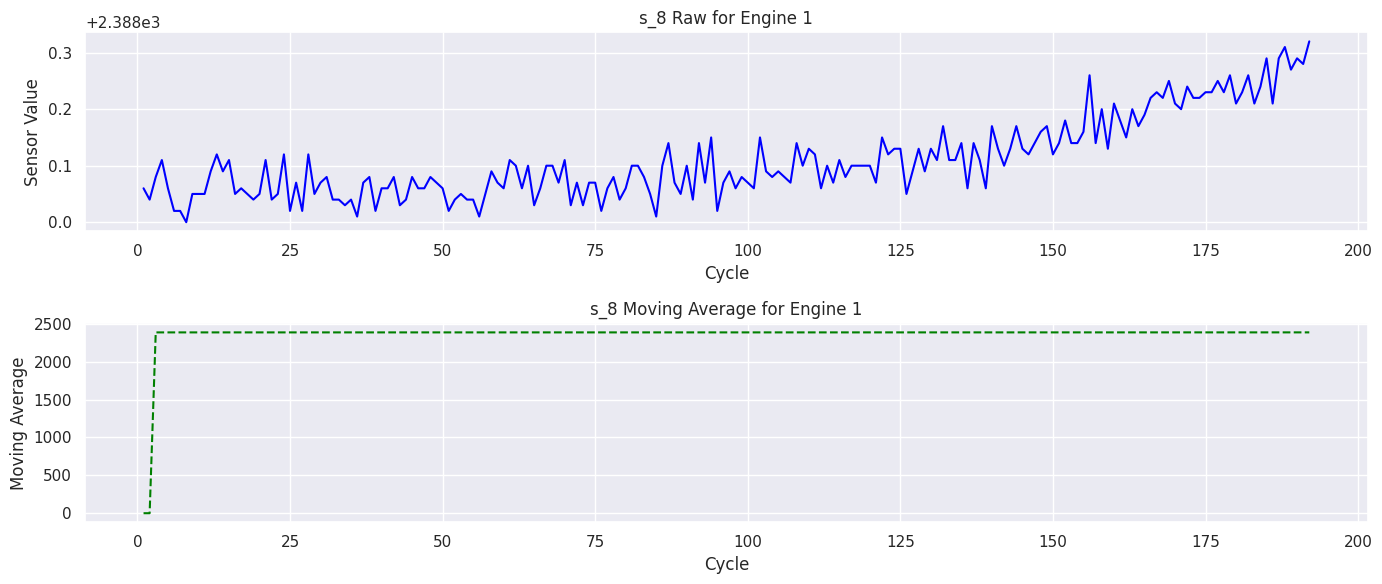

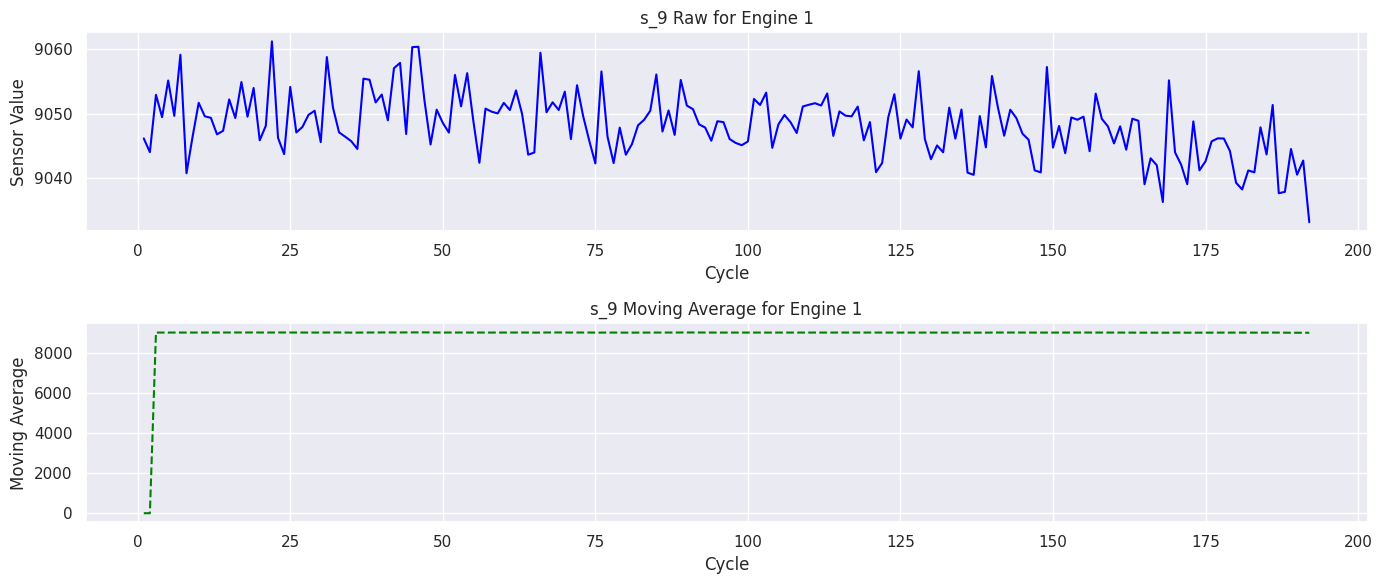

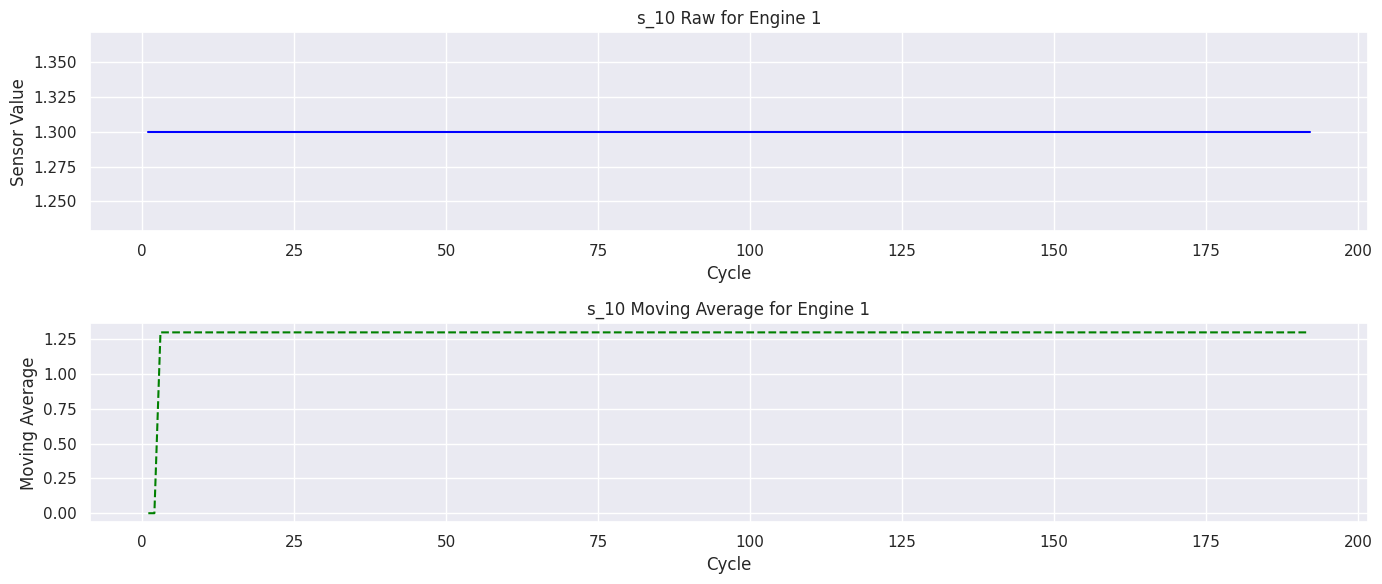

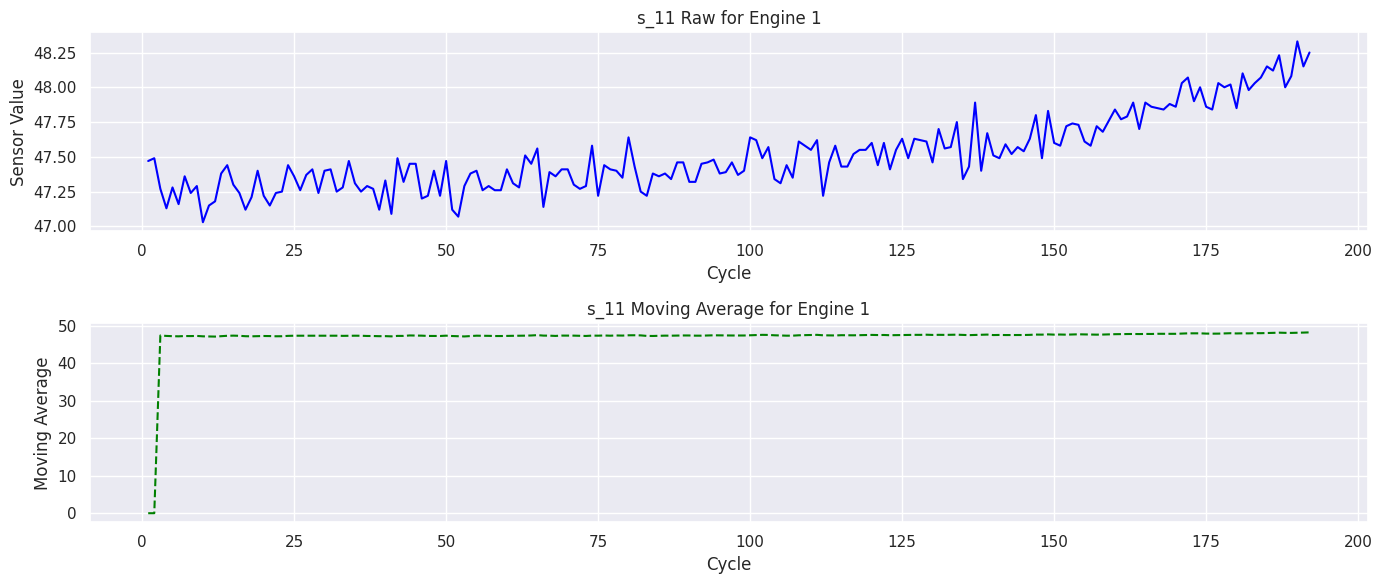

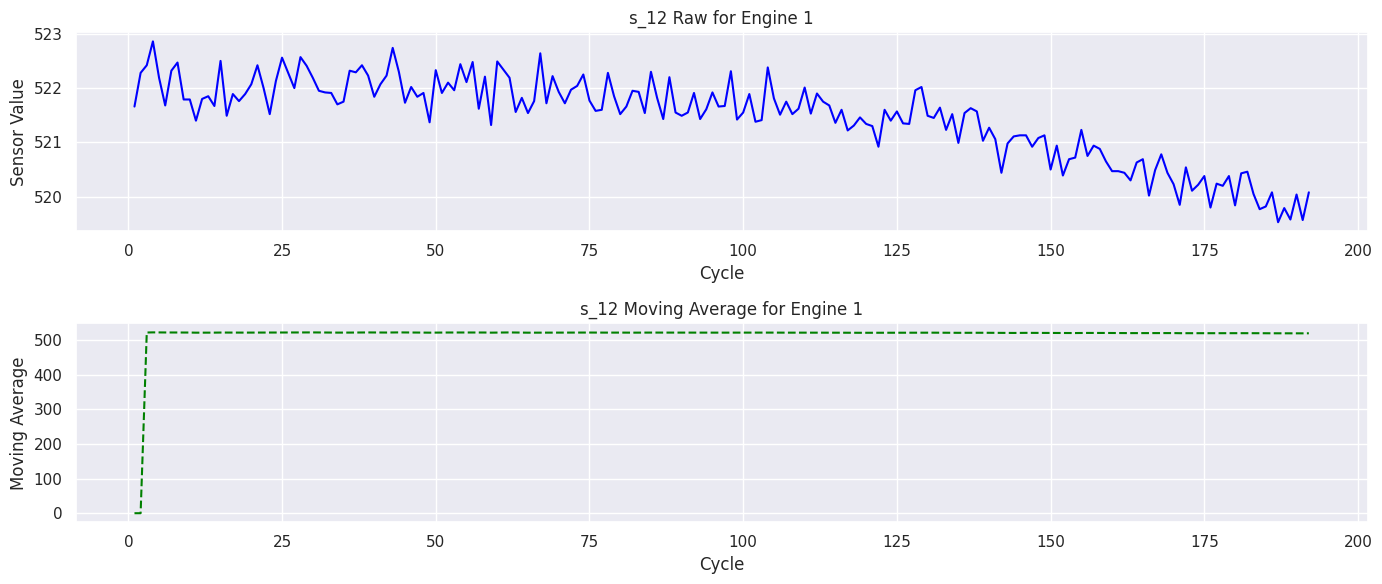

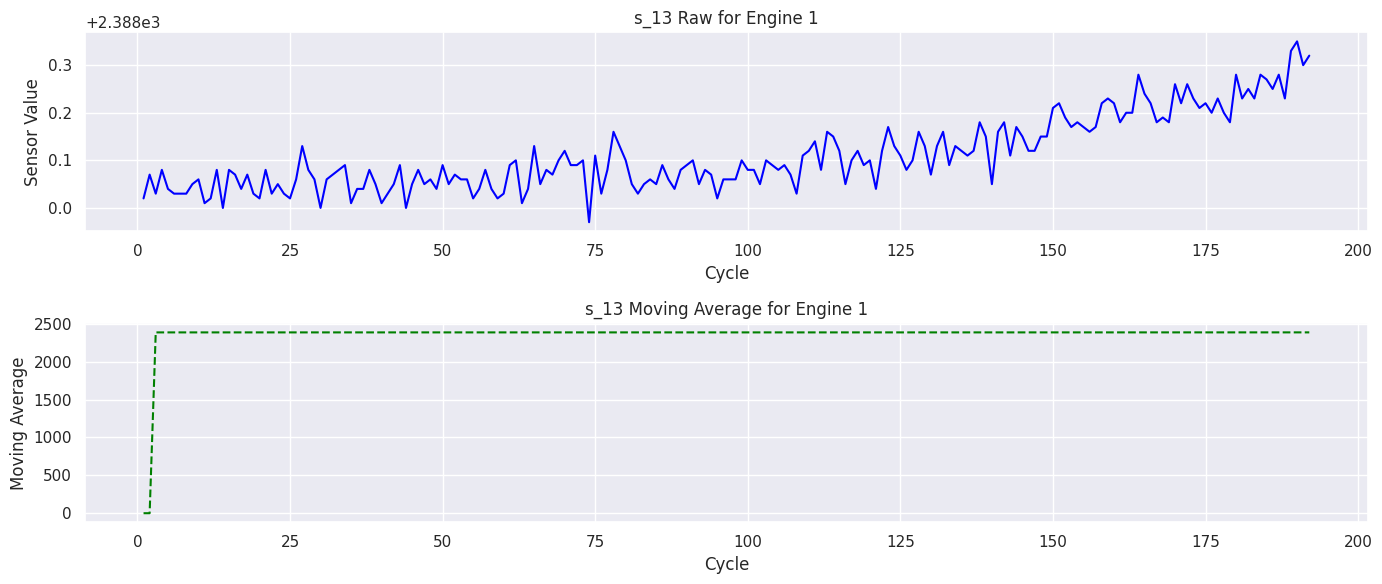

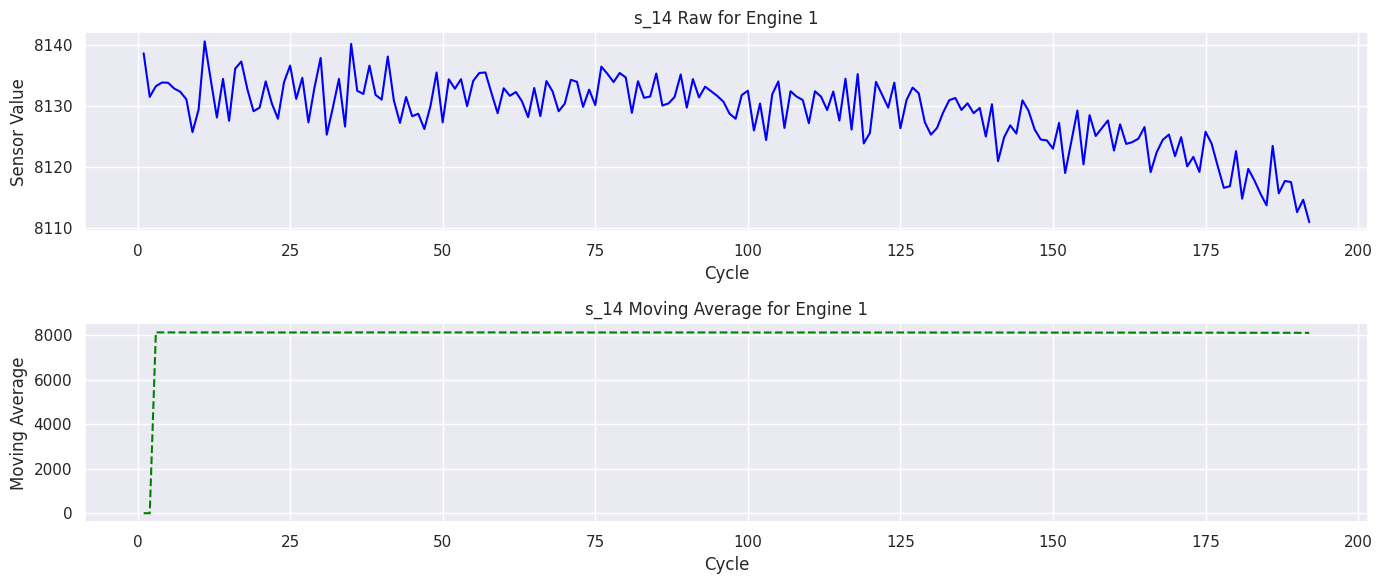

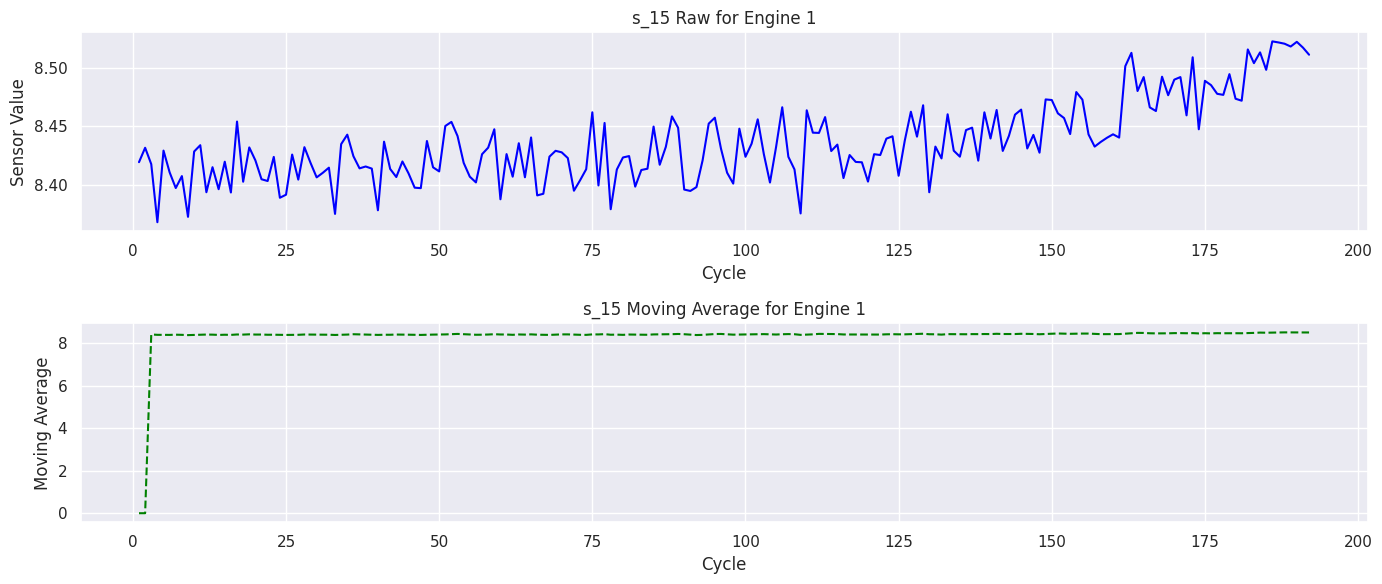

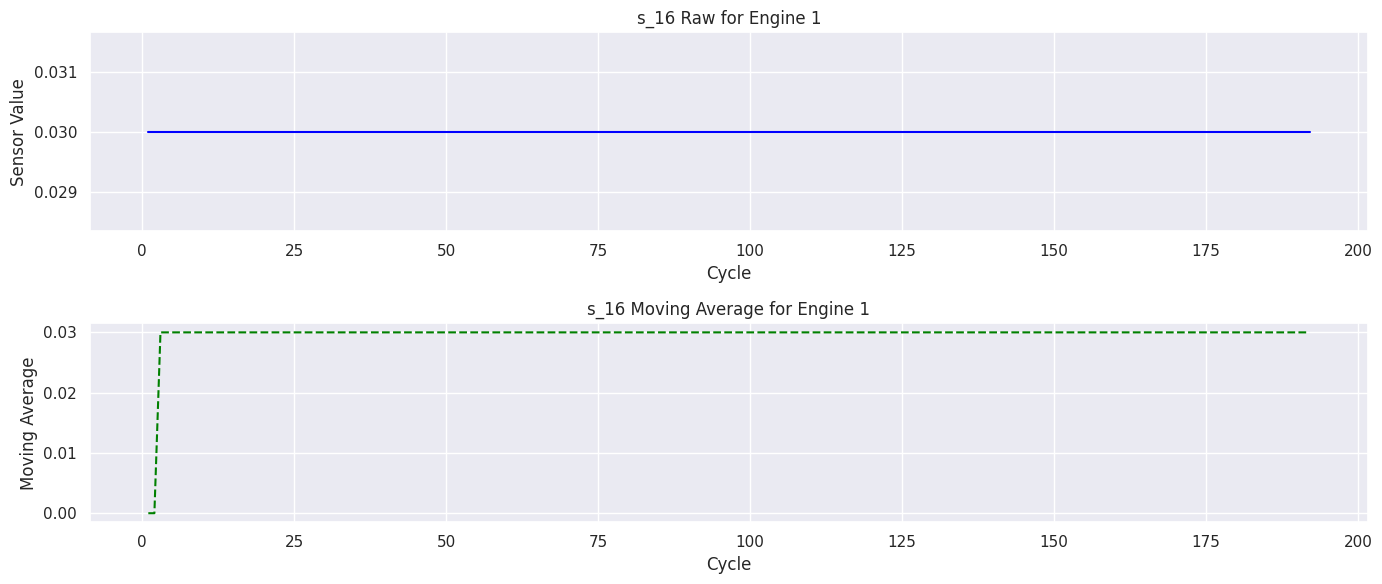

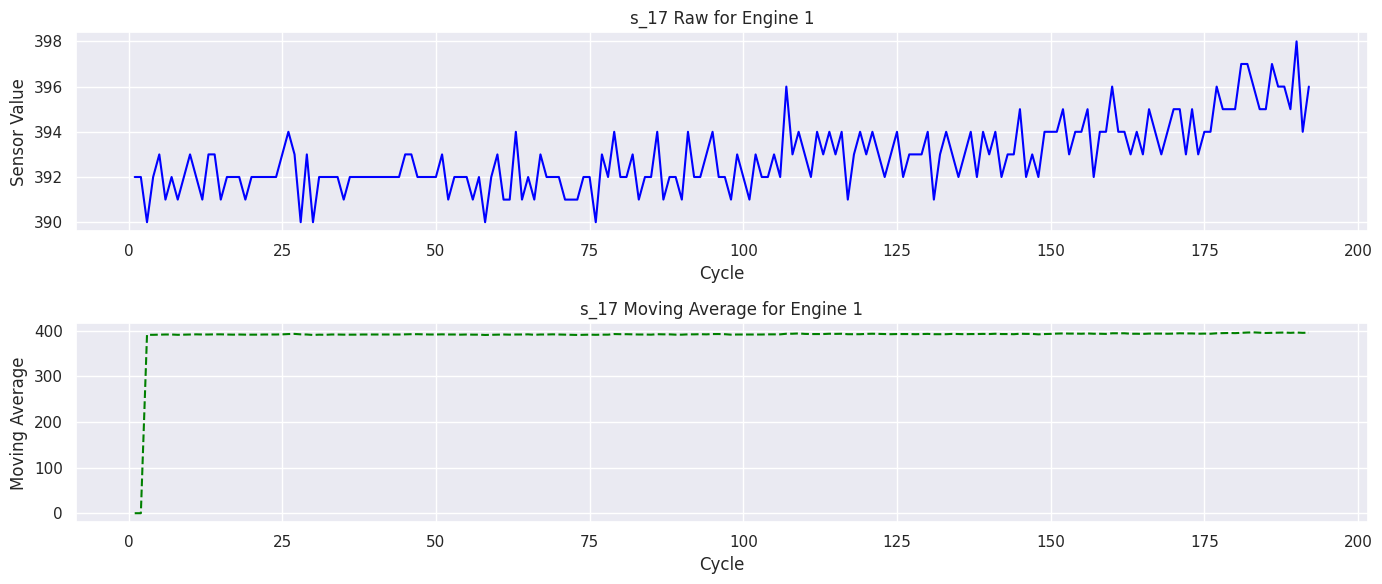

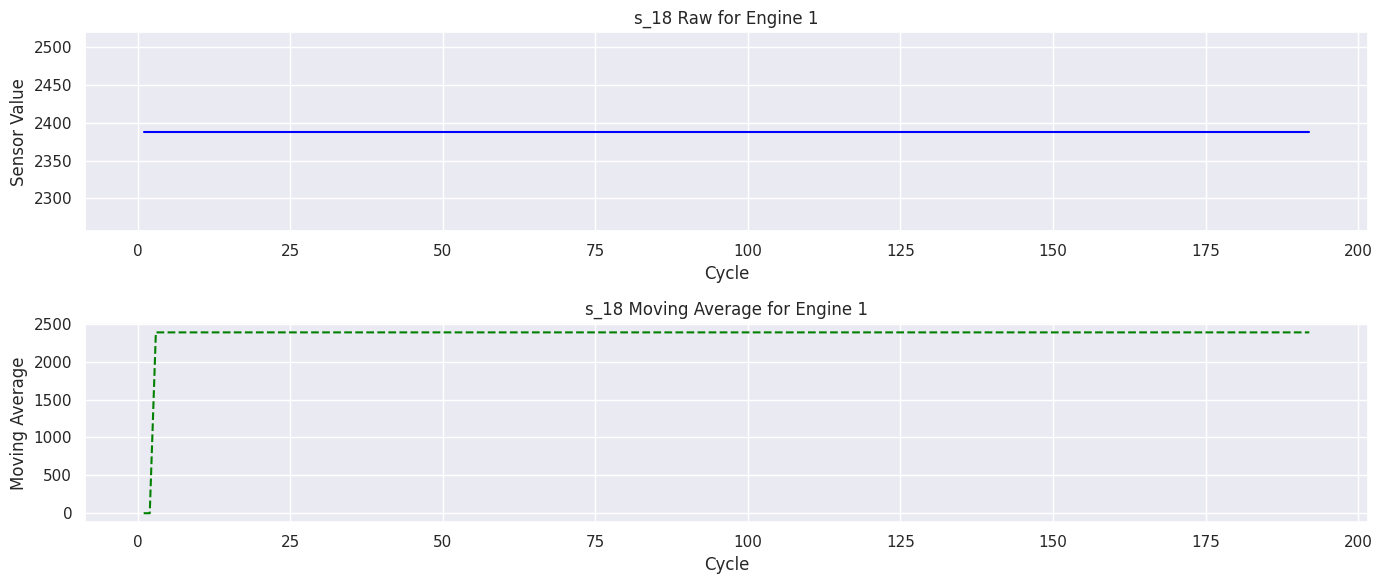

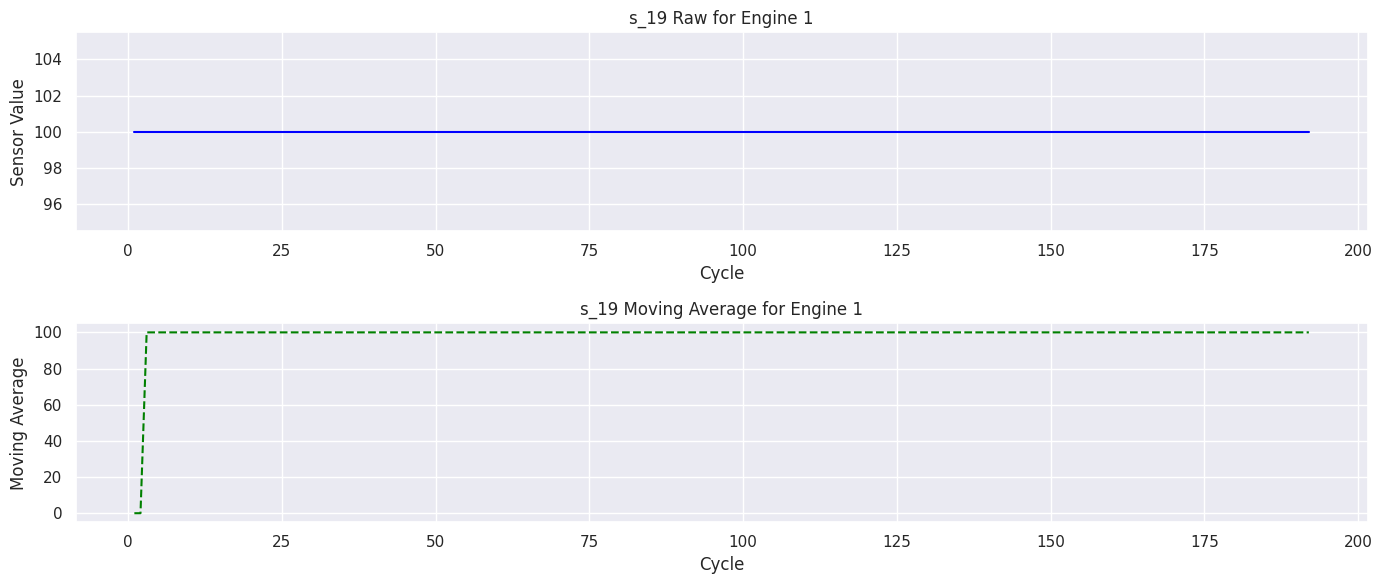

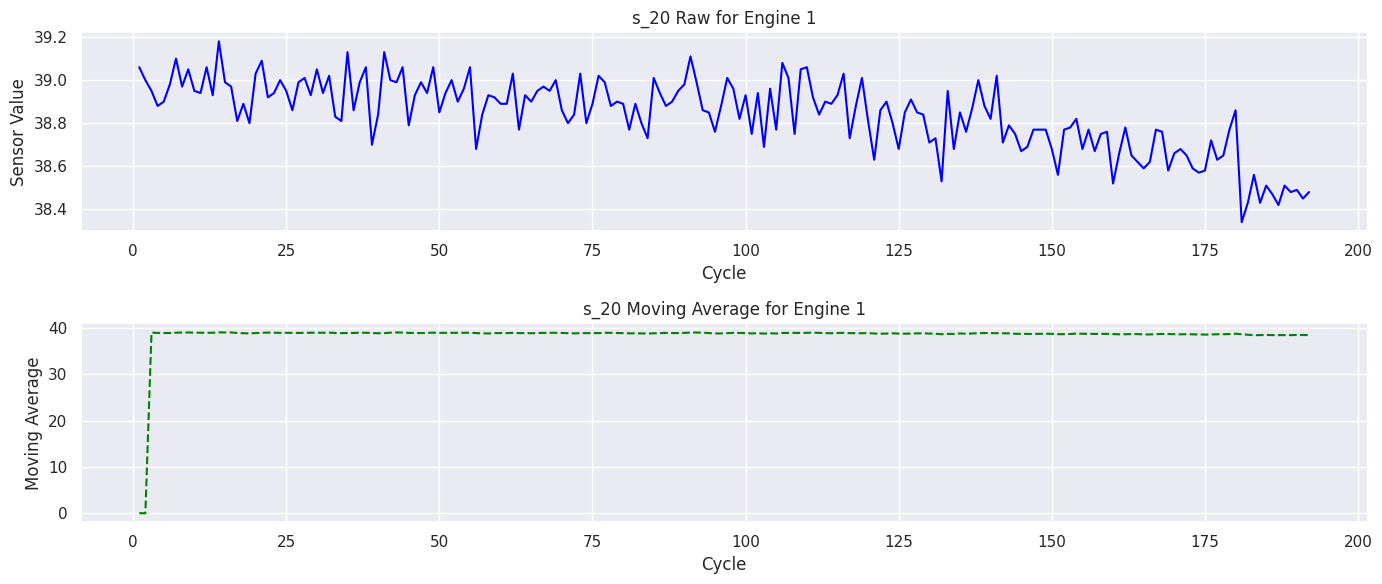

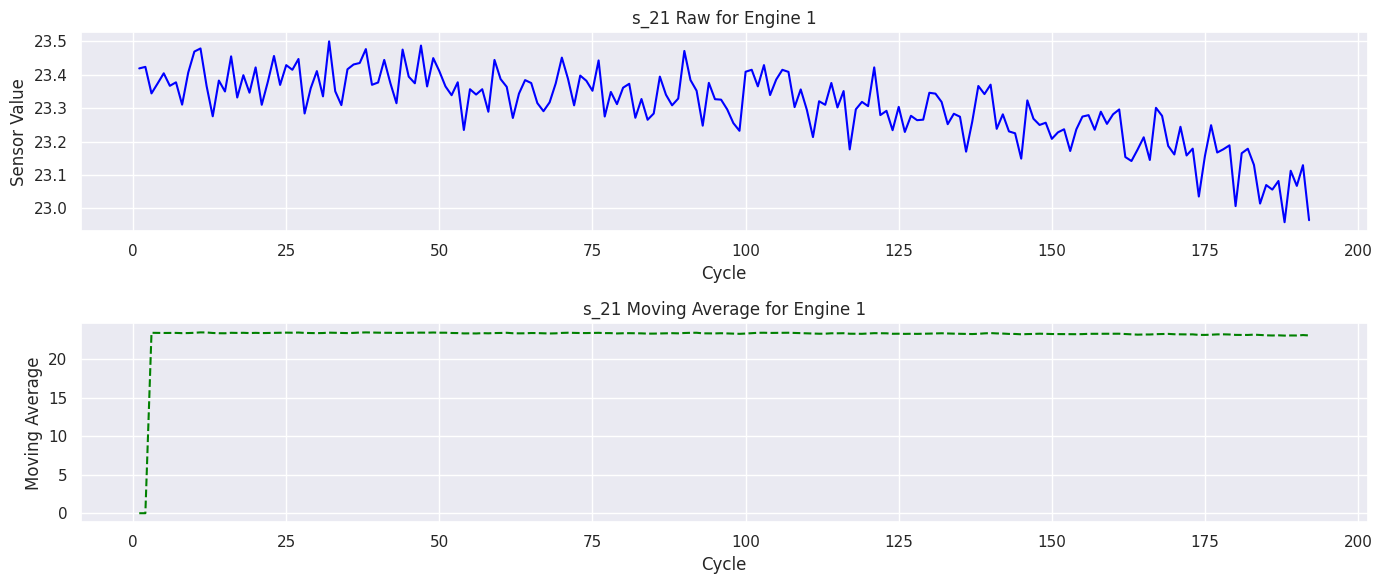

In [324]:
engine_id = 1  # Change this if you want to visualize another engine

# Loop through each sensor
for sensor in sensors:
    subset = train_copy_MA[train_copy_MA['unit_nr'] == engine_id]

    plt.figure(figsize=(14, 6))

    # Plot the raw sensor data
    plt.subplot(2, 1, 1)
    plt.plot(subset['time_cycles'], subset[sensor], color='blue')
    plt.title(f'{sensor} Raw for Engine {engine_id}')
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Value')

    # Plot the moving average of the sensor
    plt.subplot(2, 1, 2)
    plt.plot(subset['time_cycles'], subset[f'{sensor}_moving_average_3'], linestyle='--', color='green')
    plt.title(f'{sensor} Moving Average for Engine {engine_id}')
    plt.xlabel('Cycle')
    plt.ylabel('Moving Average')

    # Adjust the layout and show the plot
    plt.tight_layout()
    plt.show()


Correlation Between RUL&Moving Average 15

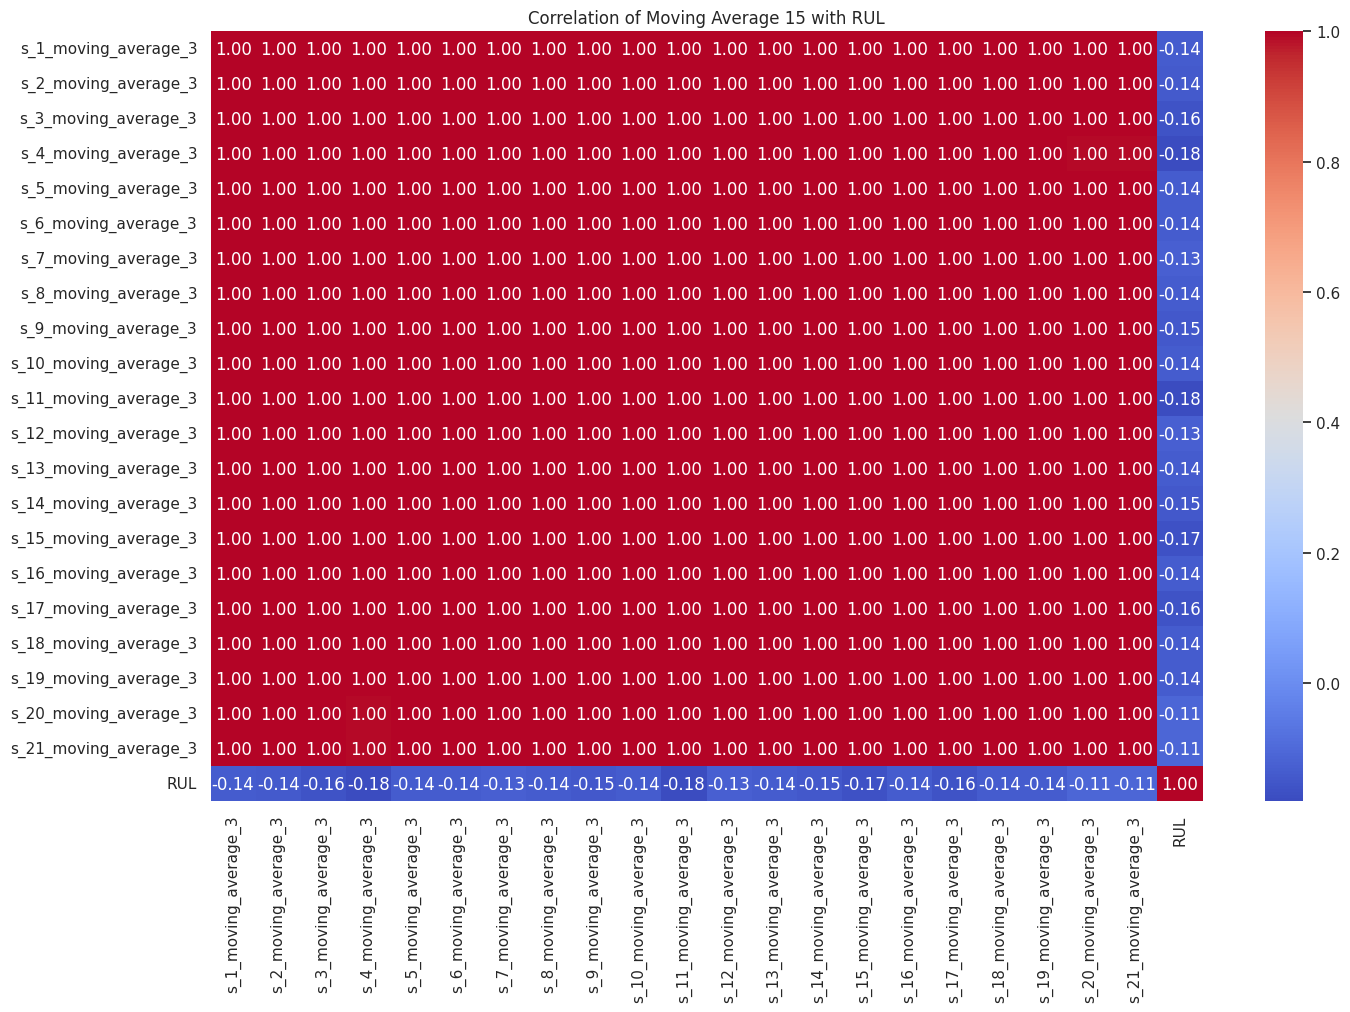

In [337]:
change_features = [col for col in train_copy_MA.columns if '_moving_average_3' in col]
corr = train_copy_MA[change_features + ['RUL']].corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation of Moving Average 15 with RUL')
plt.show()

# Extraction of only Important Features which have strong relation with RUL of the engine

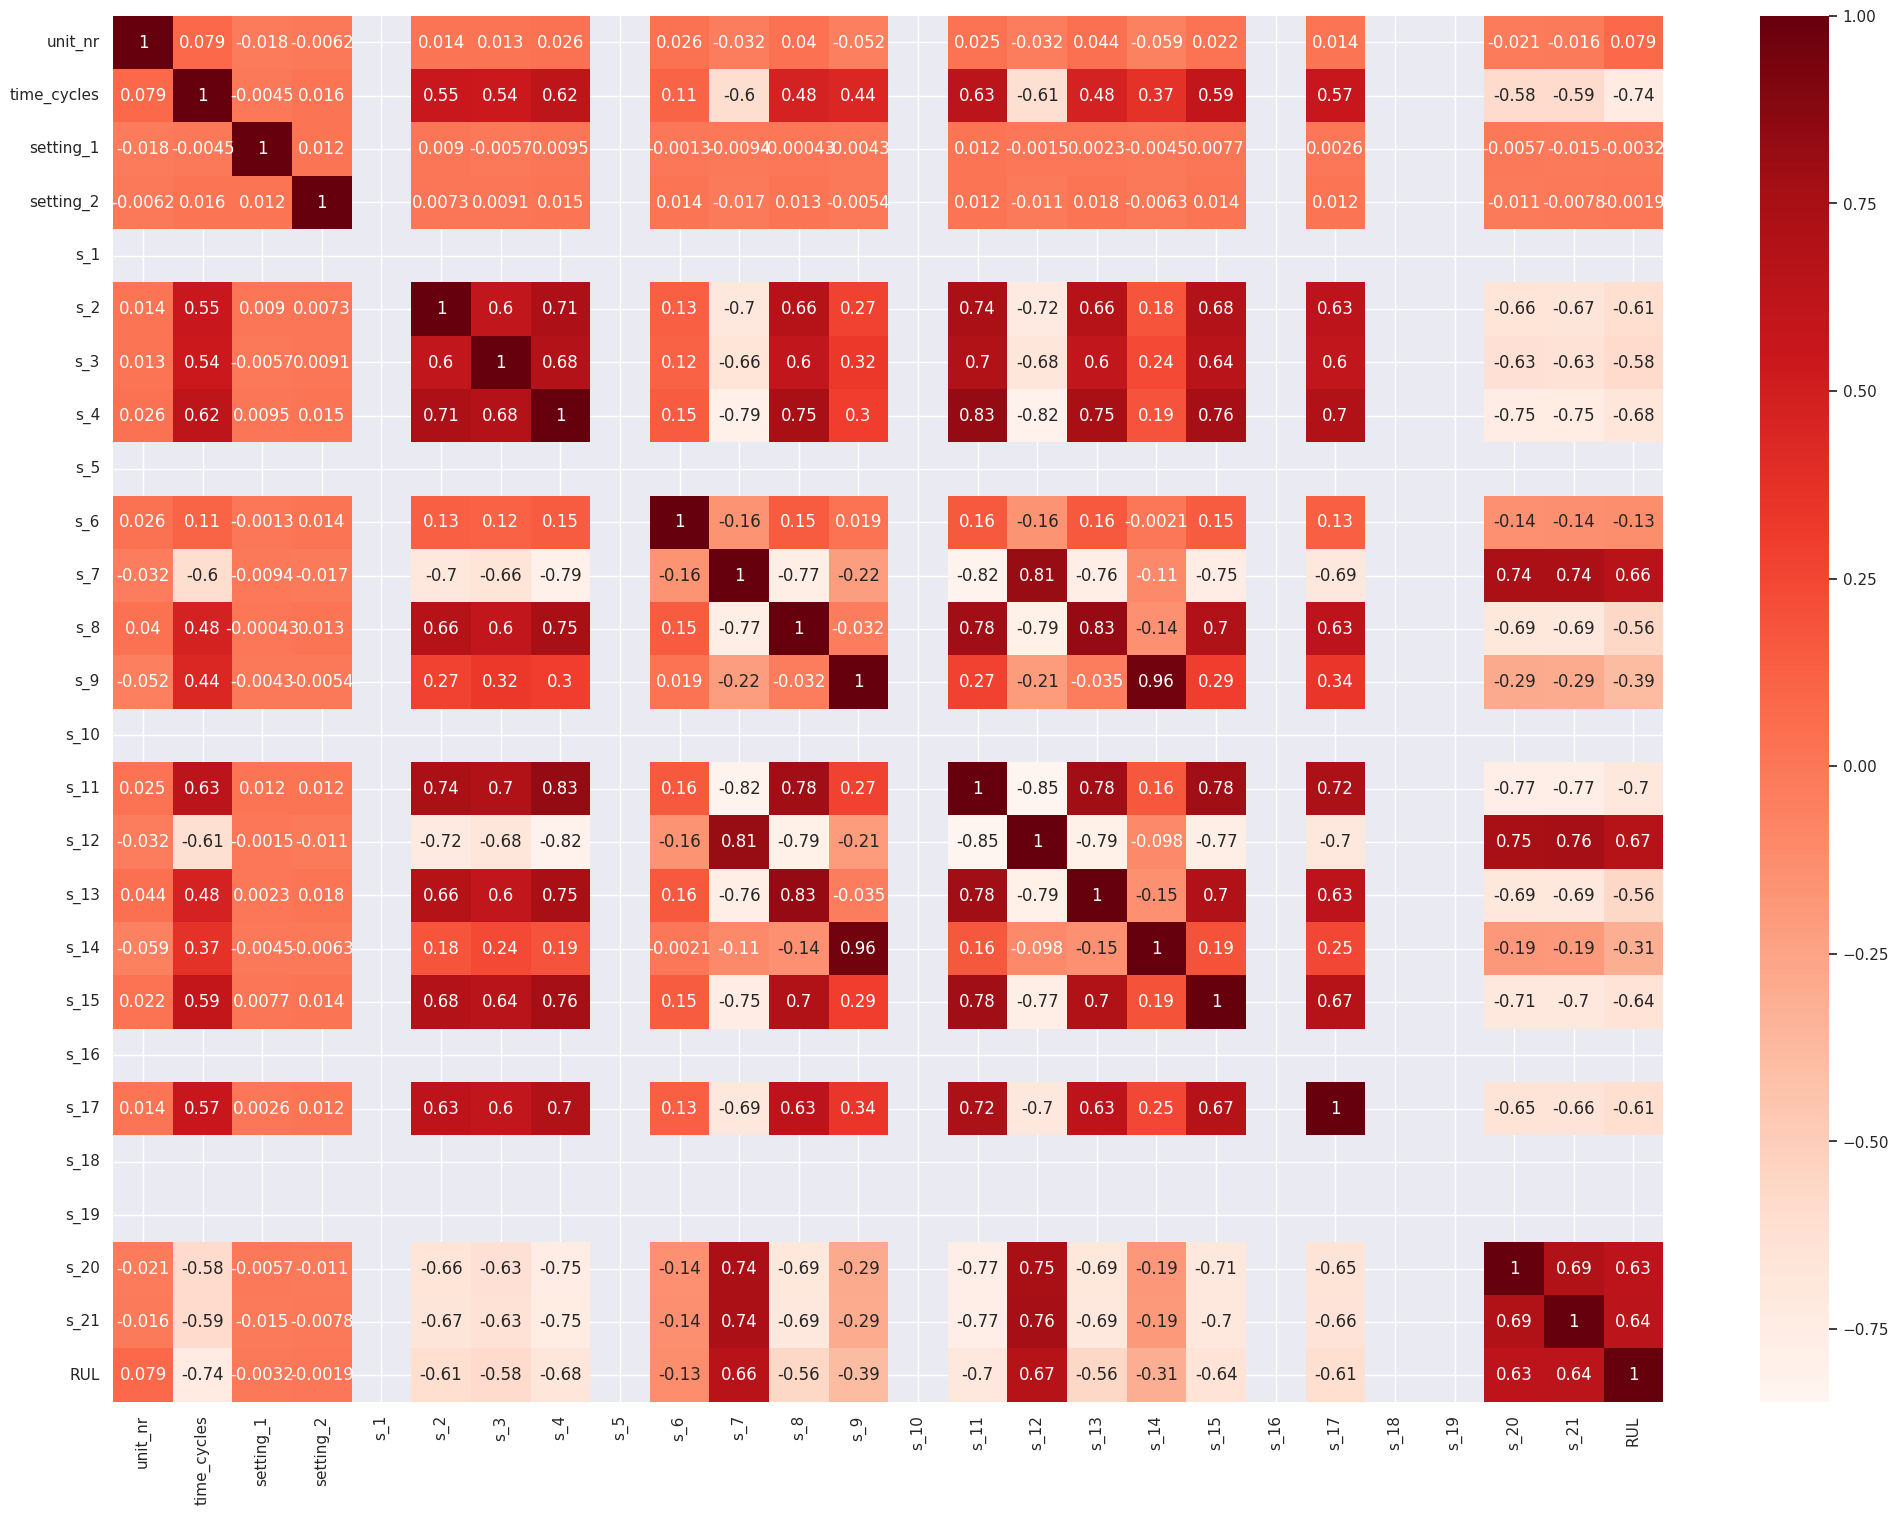

In [340]:
plt.figure(figsize=(25,18))
sns.heatmap(train.corr(),annot=True ,cmap='Reds')
plt.show()

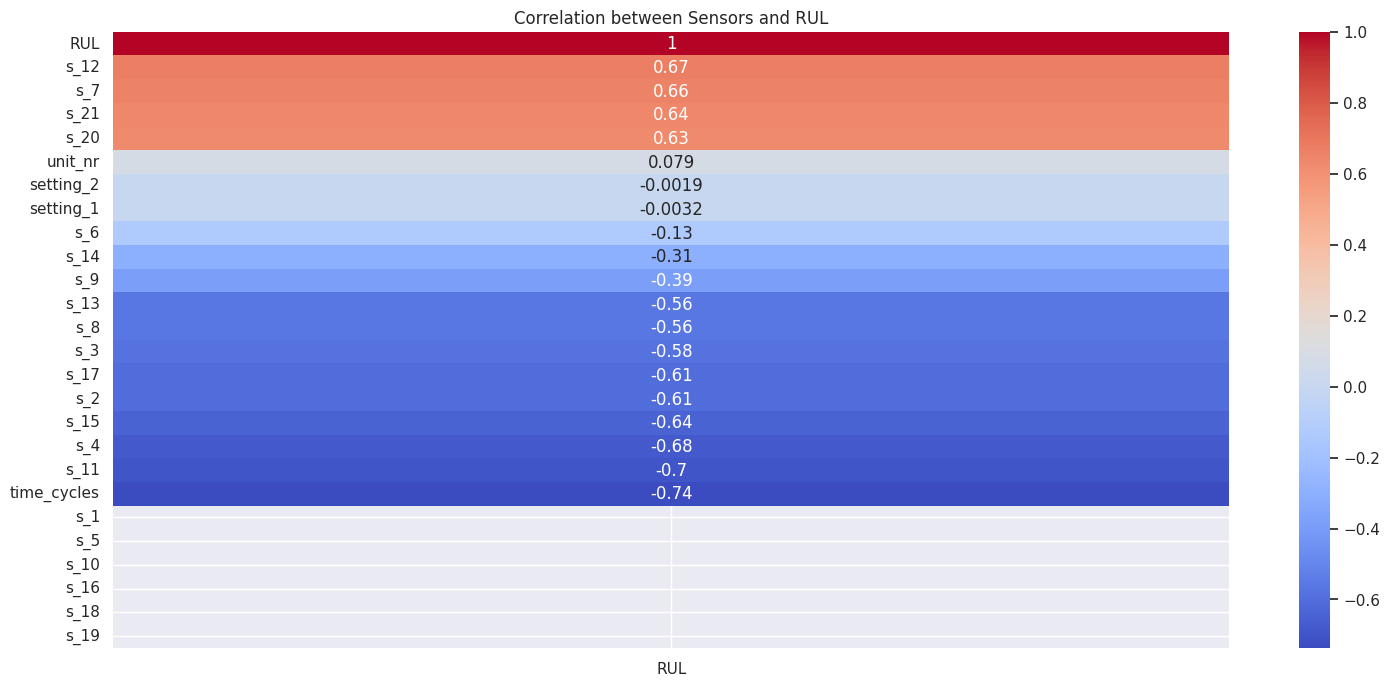

In [341]:
plt.figure(figsize=(18,8))

corr = train.corr()

sns.heatmap(corr[['RUL']].sort_values(by='RUL', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between Sensors and RUL')
plt.show()

# Filter High Correlated Features

In [342]:
corr_RUL = corr['RUL']
feature_selected =  corr_RUL[corr_RUL.abs() >= 0.5].index[1:]
feature_selected

Index(['s_2', 's_3', 's_4', 's_7', 's_8', 's_11', 's_12', 's_13', 's_15',
       's_17', 's_20', 's_21', 'RUL'],
      dtype='object')

In [343]:
# Now we will keep onlt these imprtant features in both train & test dataset.
train=train[feature_selected]
train.head()


s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  RUL  
0   392  39.06  23.4190  191  
1   392  39.00  23.4236  190  
2   390  38.95  23.3442  189  
3   392  38.88  23.3739  188  
4   393  38.90  23.4044  187

# Split

In [203]:
# train & y_train
# Calculated RUL variable is our Target variable.
y_train=train['RUL']
X_train=train.drop(['RUL'],axis=1)
X_train.head(5)

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  641.82  1589.70  1400.60  554.36  2388.06  47.47  521.66  2388.02  8.4195   
1  642.15  1591.82  1403.14  553.75  2388.04  47.49  522.28  2388.07  8.4318   
2  642.35  1587.99  1404.20  554.26  2388.08  47.27  522.42  2388.03  8.4178   
3  642.35  1582.79  1401.87  554.45  2388.11  47.13  522.86  2388.08  8.3682   
4  642.37  1582.85  1406.22  554.00  2388.06  47.28  522.19  2388.04  8.4294   

   s_17   s_20     s_21  
0   392  39.06  23.4190  
1   392  39.00  23.4236  
2   390  38.95  23.3442  
3   392  38.88  23.3739  
4   393  38.90  23.4044

In [156]:
# Test data set , keeping only train columns/features.
X_test=test.groupby('unit_nr').last().reset_index()    # take last row per engine , shows max time
X_test=X_test[X_train.columns]
X_test.head(5)

s_2      s_3      s_4     s_7      s_8   s_11    s_12     s_13    s_15  \
0  642.58  1581.22  1398.91  554.42  2388.08  47.23  521.79  2388.06  8.4024   
1  642.55  1586.59  1410.83  553.52  2388.10  47.67  521.74  2388.09  8.4505   
2  642.88  1589.75  1418.89  552.59  2388.16  47.88  520.83  2388.14  8.4119   
3  642.78  1594.53  1406.88  552.64  2388.13  47.65  521.88  2388.11  8.4634   
4  642.27  1589.94  1419.36  553.29  2388.10  47.46  521.00  2388.15  8.4362   

   s_17   s_20     s_21  
0   393  38.81  23.3552  
1   391  38.81  23.2618  
2   395  38.93  23.2740  
3   395  38.58  23.2581  
4   394  38.75  23.4117

# Clipping of RUL at 125 as after 125

In [157]:
y_train= y_train.clip(upper=125)

# Building Model

# Evaluation 2

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split


#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [30]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)

    return mae, mse, rmse, r2_square

In [45]:
models = {
    "Linear Regression": LinearRegression(),
    "knn regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(n_estimators=100 , random_state=42),
    "XGB Regressor" : XGBRegressor(objective='reg:squarederror',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    random_state = 42),
    "LightGBM" : lgb.LGBMRegressor(objective='regression',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    random_state = 42)
}

In [46]:
models_list = []
r2_list = []

In [47]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #model prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    #model evaluation
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    models_list.append(list(models.keys())[i])

    print("model training performance")

    print("mean absolute error", train_mae)
    print("mean squared error", train_mse)
    print("root mean squared error", train_rmse)
    print("r2 square", train_r2)

    print("model testing performance")
    print("mean absolute error", test_mae)
    print("mean squared error", test_mse)
    print("root mean squared error", test_rmse)
    print("r2 square", test_r2)

    print('------------------------------')


    r2_list.append(test_r2)

Linear Regression
model training performance
mean absolute error 18.48475849595108
mean squared error 516.8422560175943
root mean squared error 22.734164950962995
r2 square 0.7023848970100113
model testing performance
mean absolute error 18.24901866434957
mean squared error 525.0635555487565
root mean squared error 22.91426532858421
r2 square 0.6959448729951835
------------------------------
knn regressor
model training performance
mean absolute error 14.497949687363677
mean squared error 392.8710115845087
root mean squared error 19.820974032183905
r2 square 0.7737716968511098
model testing performance
mean absolute error 18.131999999999998
mean squared error 558.2576
root mean squared error 23.6274755316771
r2 square 0.6767227820792027
------------------------------
Decision Tree
model training performance
mean absolute error 0.0
mean squared error 0.0
root mean squared error 0.0
r2 square 1.0
model testing performance
mean absolute error 22.42
mean squared error 840.04
root mean squa

In [48]:
pd.DataFrame(list(zip(models_list, r2_list)), columns = ['model name', 'r2_score']).sort_values(by = ['r2_score'], ascending = False)

model name  r2_score
3  Random Forest Regressor  0.781182
4            XGB Regressor  0.779579
5                 LightGBM  0.778297
0        Linear Regression  0.695945
1            knn regressor  0.676723
2            Decision Tree  0.513548

# Hyperparameters using RandomizedSearchCV

## LightGBM Model

In [52]:
#Model
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

# parameters
lgb_param_dist = {
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'min_child_samples': randint(5, 50),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# RandomizedSearchCV
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model
lgb_random_search.fit(X_train, y_train)

# best param
print("LightGBM Best Parameters:", lgb_random_search.best_params_)





Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2163
[LightGBM] [Info] Number of data points in the train set: 20631, number of used features: 12
[LightGBM] [Info] Start training from score 86.829286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [53]:
lgb_best_model = lgb_random_search.best_estimator_
lgb_y_pred = lgb_best_model.predict(X_test)
print("LightGBM RMSE on Test Set:", np.sqrt(mean_squared_error(y_test, lgb_y_pred)))
print("LightGBM r2 Score on Test Set:", r2_score(y_test, lgb_y_pred))

LightGBM RMSE on Test Set: 20.197746606555825
LightGBM r2 Score on Test Set: 0.7637638835134758


## XGBoost Model

In [54]:
# Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# parameters
xgb_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# RandomizedSearch
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
#fit model
xgb_random_search.fit(X_train, y_train)
# Best Param
print("XGBoost Best Parameters:", xgb_random_search.best_params_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost Best Parameters: {'colsample_bytree': np.float64(0.5354704584999639), 'gamma': np.float64(0.1983919136069442), 'learning_rate': np.float64(0.02523055931181908), 'max_depth': 5, 'n_estimators': 570, 'reg_alpha': np.float64(0.027616771873704704), 'reg_lambda': np.float64(0.5788648955075587), 'subsample': np.float64(0.7192370615090435)}


In [56]:
xgb_best_model = xgb_random_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
print("XGBoost RMSE on Test Set:", np.sqrt(mean_squared_error(y_test, xgb_y_pred)))
print("XGBoost r2 Score on Test Set:", r2_score(y_test, xgb_y_pred))

XGBoost RMSE on Test Set: 19.75053385725268
XGBoost r2 Score on Test Set: 0.7741093635559082


## RandomForestRegressor Model

In [57]:
# Model
rf_model = RandomForestRegressor(random_state=42)

# parameters
rf_param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [10, 20, 50, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit Model
rf_random_search.fit(X_train, y_train)

# best param
print("RandomForestRegressor Best Parameters:", rf_random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
57 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomForestRegressor Best Parameters: {'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 895}


In [58]:
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)
print("RandomForestRegressor RMSE on Validation Set:", np.sqrt(mean_squared_error(y_test, rf_y_pred)))
print("RandomForestRegressor r2 Score on Test Set:", r2_score(y_test, rf_y_pred))

RandomForestRegressor RMSE on Validation Set: 20.107050168795755
RandomForestRegressor r2 Score on Test Set: 0.7658807205301029
